In [29]:
# Setup imports and short-form names for each of the packages needed for data processing and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [30]:
# Read data from the file and store in the variable `data`
# add types for each column
data = pd.read_csv('Assign_data.csv', dtype={'Year': int, '113 Cause Name': str, 'Cause Name': 'category', 'State': 'category', 'Deaths': float, 'Age-adjusted Death Rate': float})
data.index.name = 'Index'
data.columns = map(str.capitalize, data.columns)
# Print the first 10 rows of the data
# print('First 10 rows of data:')
data.head(10)


,Year,113 cause name,Cause name,State,Deaths,Age-adjusted death rate
Index,,,,,,
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7
5,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Colorado,1519.0,39.0
6,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Connecticut,1034.0,29.3
7,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Delaware,267.0,35.3
8,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,District of Columbia,161.0,28.4


In [31]:
# Print the last 5 rows of the data
# print('\nLast 5 rows of data:')
data.tail(5)

,Year,113 cause name,Cause name,State,Deaths,Age-adjusted death rate
Index,,,,,,
15023,2015,Septicemia (A40-A41),Septicemia,Virginia,1187.0,13.0
15024,2015,Septicemia (A40-A41),Septicemia,Washington,501.0,6.3
15025,2015,Septicemia (A40-A41),Septicemia,West Virginia,348.0,13.9
15026,2015,Septicemia (A40-A41),Septicemia,Wisconsin,517.0,7.2
15027,2015,Septicemia (A40-A41),Septicemia,Wyoming,46.0,7.1


In [32]:
# Print summary information on the data table columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15028 entries, 0 to 15027
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Year                     15028 non-null  int64   
 1   113 cause name           15028 non-null  object  
 2   Cause name               15028 non-null  category
 3   State                    15028 non-null  category
 4   Deaths                   15013 non-null  float64 
 5   Age-adjusted death rate  14917 non-null  float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 500.2+ KB


In [33]:
# Print the number of empty values in each column
print("Number of empty values:")
print(data.isna().sum())

# Print the number of null values in each column
print("\nNumber of null values:")
print(data.isnull().sum())

Number of empty values:
Year                         0
113 cause name               0
Cause name                   0
State                        0
Deaths                      15
Age-adjusted death rate    111
dtype: int64

Number of null values:
Year                         0
113 cause name               0
Cause name                   0
State                        0
Deaths                      15
Age-adjusted death rate    111
dtype: int64


In [34]:
# Print descriptive statistics for the data
print(data.describe())

               Year        Deaths  Age-adjusted death rate
count  15028.000000  1.501300e+04             14917.000000
mean    2007.000000  1.023261e+04                86.526393
std        4.899142  9.003261e+04               190.764950
min     1999.000000  1.000000e+01                 1.300000
25%     2003.000000  2.940000e+02                 8.300000
50%     2007.000000  8.380000e+02                18.900000
75%     2011.000000  2.737000e+03                46.300000
max     2015.000000  2.712630e+06              1087.300000


In [35]:
data['Cause name'].cat.categories

Index(['All Causes', 'Alzheimer's disease', 'CLRD', 'Cancer',
       'Chronic liver disease and cirrhosis', 'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease', 'Homicide',
       'Influenza and pneumonia', 'Kidney Disease', 'Parkinson's disease',
       'Pneumonitis due to solids and liquids', 'Septicemia', 'Stroke',
       'Suicide', 'Unintentional Injuries'],
      dtype='object')

In [36]:
us = data.loc[data['State'] == 'United States']
us.head(5)

,Year,113 cause name,Cause name,State,Deaths,Age-adjusted death rate
Index,,,,,,
45,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,97860.0,35.3
98,2000,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,97900.0,34.9
151,2001,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,101537.0,35.7
204,2002,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,106742.0,37.1
256,2003,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,109277.0,37.6


In [37]:
us.value_counts('Cause name')

Cause name
All Causes                                               17
Influenza and pneumonia                                  17
Suicide                                                  17
Stroke                                                   17
Septicemia                                               17
Pneumonitis due to solids and liquids                    17
Parkinson's disease                                      17
Kidney Disease                                           17
Homicide                                                 17
Alzheimer's disease                                      17
Essential hypertension and hypertensive renal disease    17
Diseases of Heart                                        17
Diabetes                                                 17
Chronic liver disease and cirrhosis                      17
Cancer                                                   17
CLRD                                                     17
Unintentional Injuries       

In [38]:
# remove all causes
us = us.loc[us['Cause name'] != 'All Causes']


<AxesSubplot:title={'center':'Deaths by Year in the United States'}, xlabel='Year'>

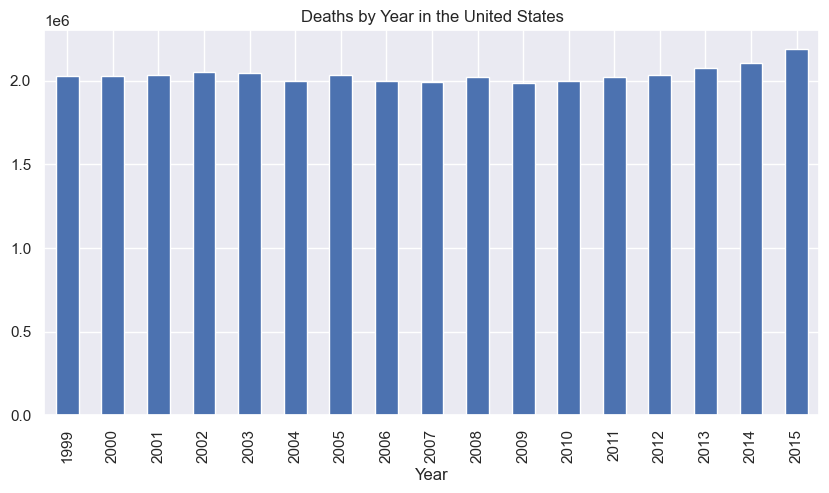

In [39]:
# total deaths by year
us_by_year = us.groupby('Year')['Deaths'].sum()
us_by_year.plot(kind='bar', figsize=(10, 5), title='Deaths by Year in the United States')

<AxesSubplot:title={'center':'Total Deaths by Cause for the US'}, xlabel='Year'>

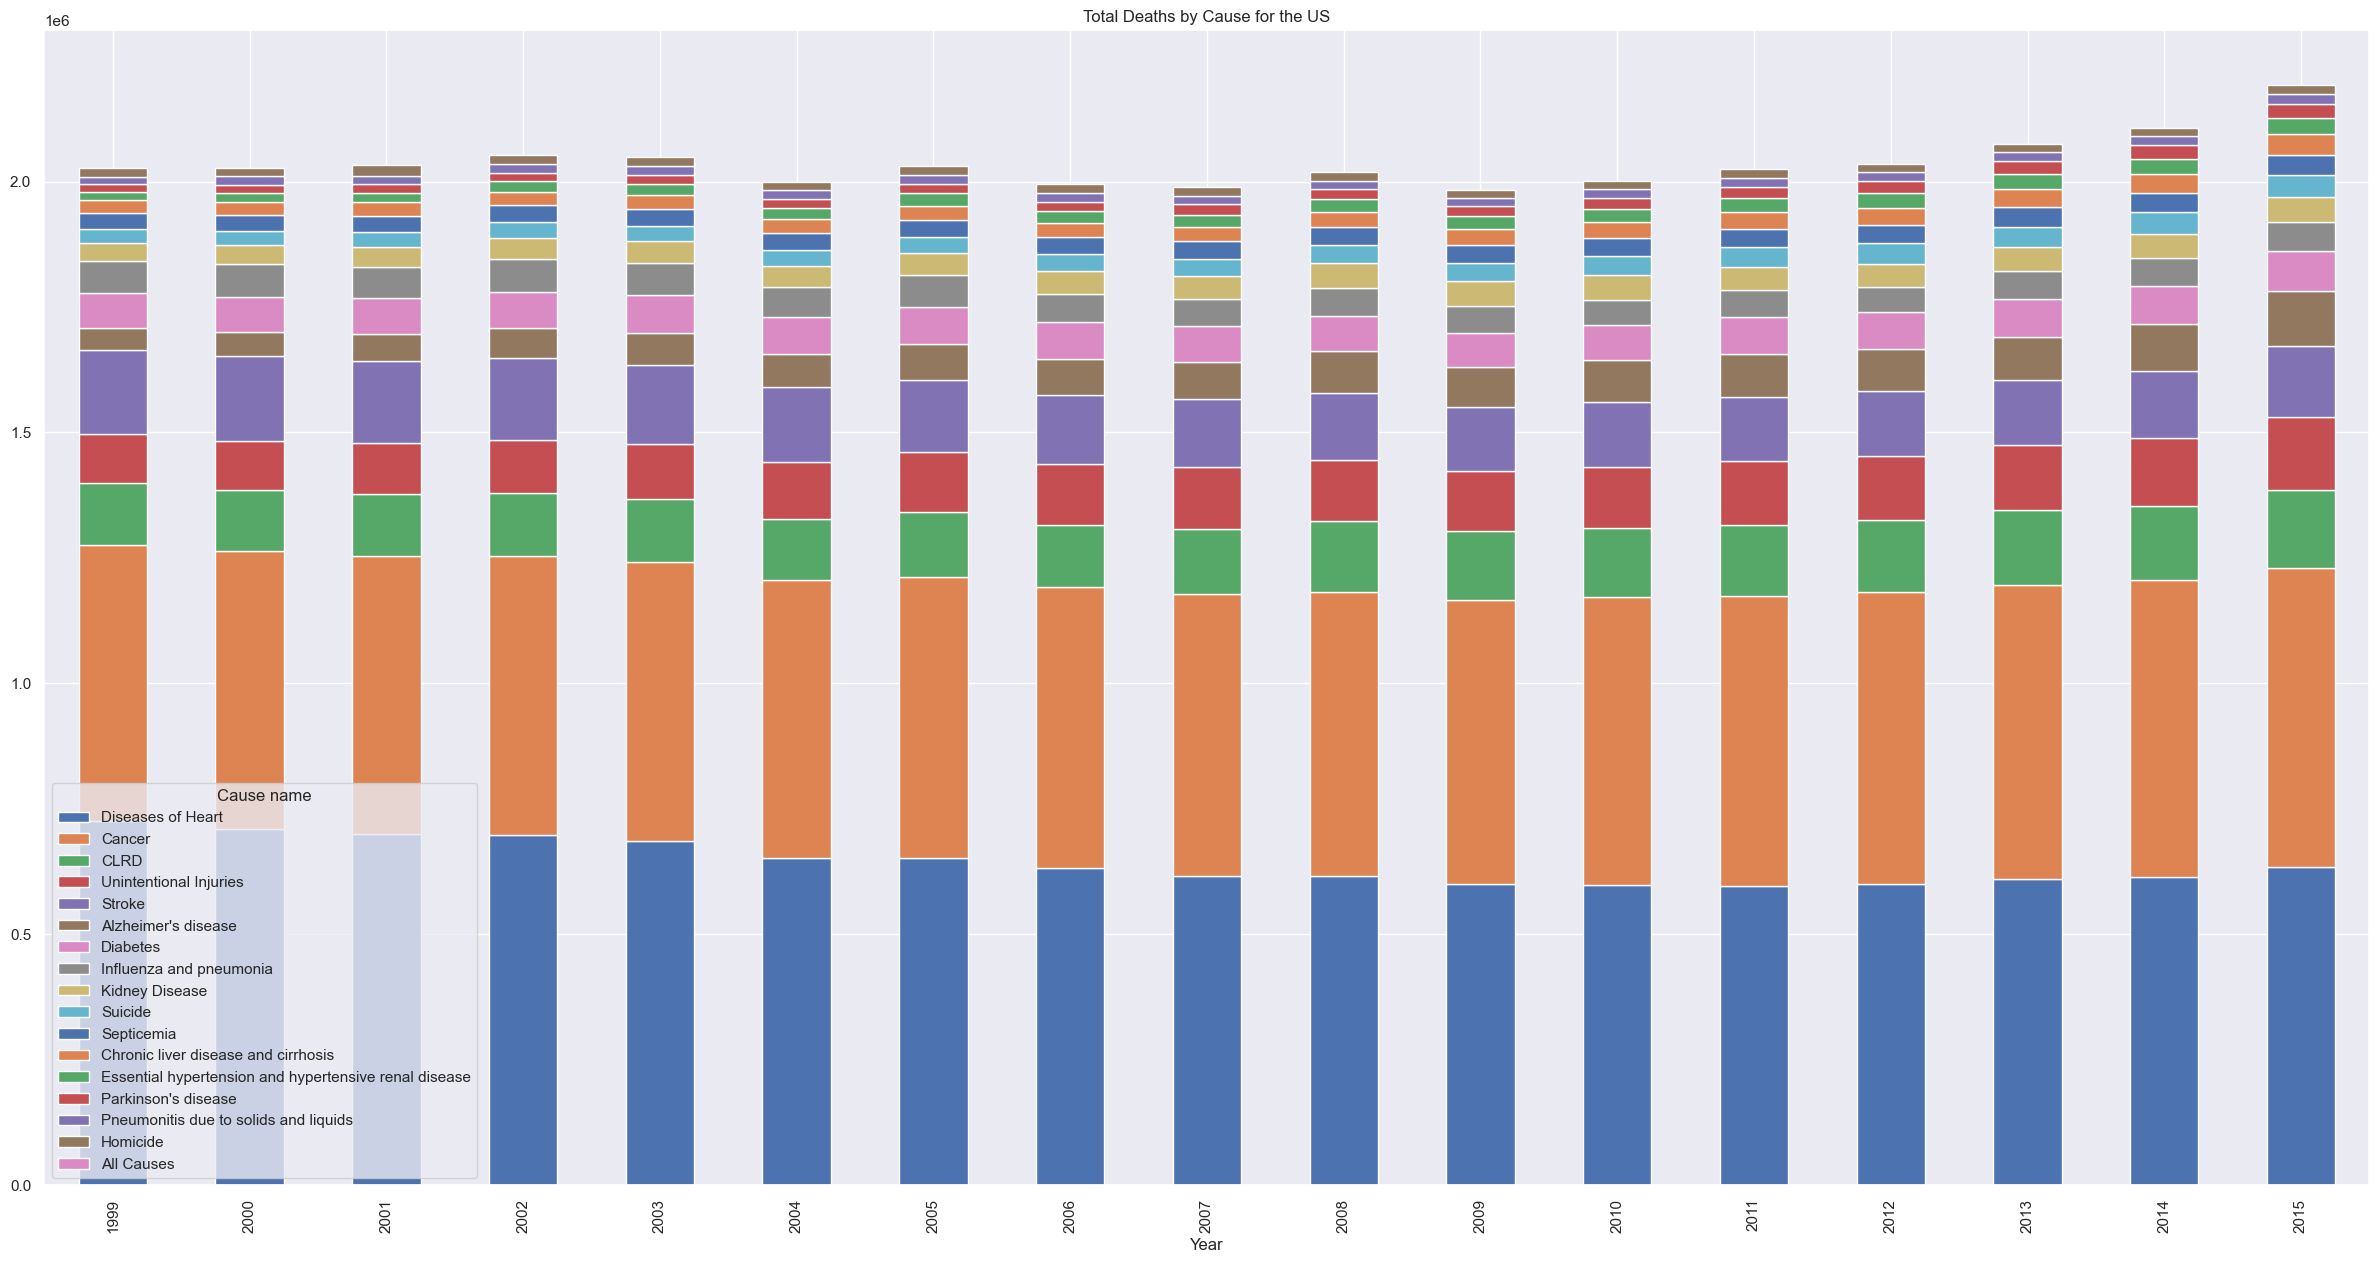

In [40]:
# create a stacked bar chart for the whole us, each bar is a year and each stack is a cause
us.groupby(['Year', 'Cause name'])['Deaths'].sum().unstack().sort_values(by=2015, axis=1, ascending=False).plot(kind='bar', stacked=True, figsize=(30, 15), title='Total Deaths by Cause for the US')

Text(0.5, 1.0, 'Deaths by Cause by Year in the United States')

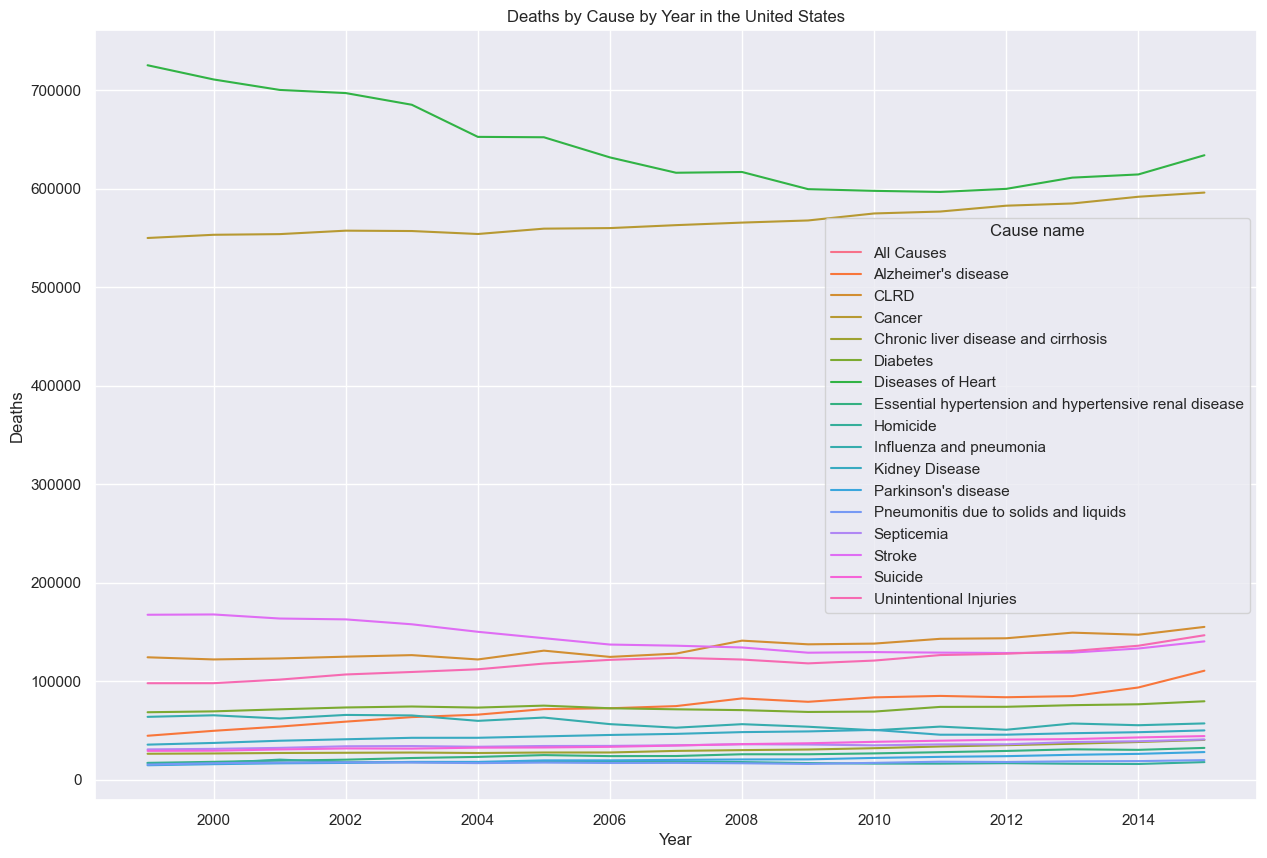

In [41]:
# similar data to above but line chart in seaborn
sns.set(rc={"figure.figsize":(15, 10)}) 
sns.lineplot(data=us, x='Year', y='Deaths', hue='Cause name').set_title('Deaths by Cause by Year in the United States')




<AxesSubplot:title={'center':'Deaths by Cause in the United States'}, xlabel='Cause name'>

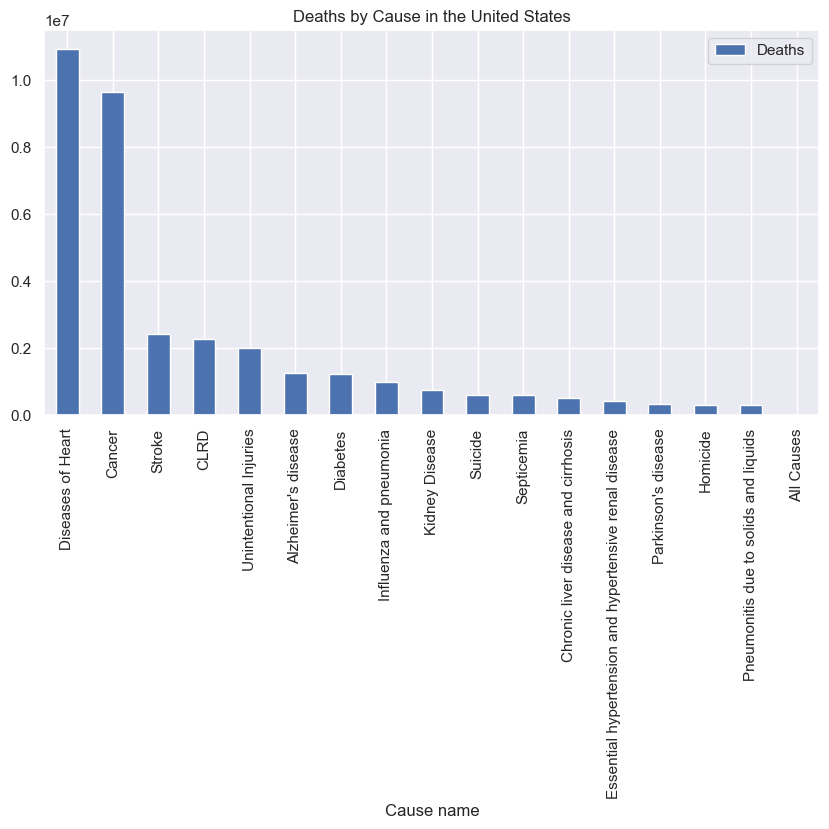

In [42]:
# total deaths by cause across all years
us_by_cause = us.groupby('Cause name')['Deaths'].sum().sort_values(ascending=False).to_frame()
us_by_cause.plot(kind='bar', figsize=(10, 5), title='Deaths by Cause in the United States')

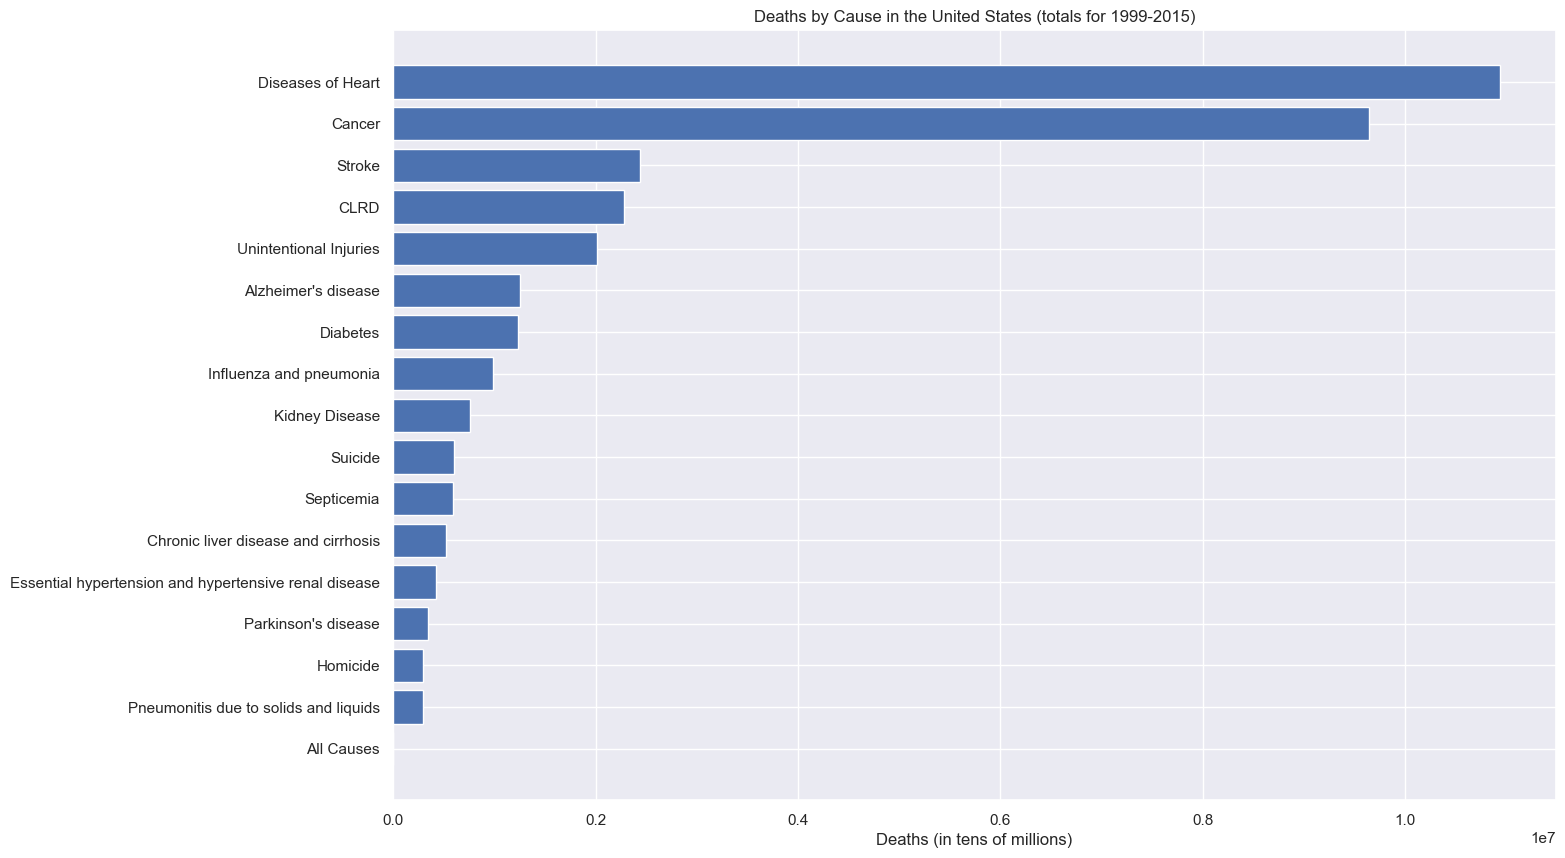

In [43]:
# rotate the above chart to make the labels easier to read
# first re-sort so the largest values are at the top
us_by_cause = us_by_cause.sort_values(by='Deaths', ascending=True)
# barh = horizontal bar chart
fig, ax = plt.subplots()
ax.barh(us_by_cause.index, us_by_cause['Deaths'])
ax.set_title('Deaths by Cause in the United States (totals for 1999-2015)')
ax.set_xlabel("Deaths (in tens of millions)")
plt.show()

In [44]:

# list the top 5 causes of death for each year for the US
us_by_year_cause = us.groupby(['Year', 'Cause name'])['Deaths'].sum().to_frame()
us_by_year_cause = us_by_year_cause.drop('All Causes', level=1)

# print all lines
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
	print(us_by_year_cause.sort_values(['Year', 'Deaths'], ascending=[True, False])
		.groupby(level=0, as_index=False)
		.apply(lambda x: x.head(5) if len(x) >= 5 else x.head(0))
		.reset_index(level=0, drop=True)
	)

                               Deaths
Year Cause name                      
1999 Diseases of Heart       725192.0
     Cancer                  549838.0
     Stroke                  167366.0
     CLRD                    124181.0
     Unintentional Injuries   97860.0
2000 Diseases of Heart       710760.0
     Cancer                  553091.0
     Stroke                  167661.0
     CLRD                    122009.0
     Unintentional Injuries   97900.0
2001 Diseases of Heart       700142.0
     Cancer                  553768.0
     Stroke                  163538.0
     CLRD                    123013.0
     Unintentional Injuries  101537.0
2002 Diseases of Heart       696947.0
     Cancer                  557271.0
     Stroke                  162672.0
     CLRD                    124816.0
     Unintentional Injuries  106742.0
2003 Diseases of Heart       685089.0
     Cancer                  556902.0
     Stroke                  157689.0
     CLRD                    126382.0
     Uninten

In [113]:
# show deaths by cause for the whole US by year
us_year_x_cause = us_by_year_cause.unstack()
us_year_x_cause

Deaths                      \
Cause name Alzheimer's disease      CLRD    Cancer   
Year                                                 
1999                   44536.0  124181.0  549838.0   
2000                   49558.0  122009.0  553091.0   
2001                   53852.0  123013.0  553768.0   
2002                   58866.0  124816.0  557271.0   
2003                   63457.0  126382.0  556902.0   
2004                   65965.0  121987.0  553888.0   
2005                   71599.0  130933.0  559312.0   
2006                   72432.0  124583.0  559888.0   
2007                   74632.0  127924.0  562875.0   
2008                   82435.0  141090.0  565469.0   
2009                   79003.0  137353.0  567628.0   
2010                   83494.0  138080.0  574743.0   
2011                   84974.0  142943.0  576691.0   
2012                   83637.0  143489.0  582623.0   
2013                   84767.0  149205.0  584881.0   
2014                   93541.0  147101.0  591700.0   
2015                  110561.0  155041.0  595930.0   

                                                                           \
Cause name Chronic liver disease and cirrhosis Diabetes Diseases of Heart   
Year                                                                        
1999                                   26259.0  68399.0          725192.0   
2000                                   26552.0  69301.0          710760.0   
2001                                   27035.0  71372.0          700142.0   
2002                                   27257.0  73249.0          696947.0   
2003                                   27503.0  74219.0          685089.0   
2004                                   27013.0  73138.0          652486.0   
2005                                   27530.0  75119.0          652091.0   
2006                                   27555.0  72449.0          631636.0   
2007                                   29165.0  71382.0          616067.0   
2008                                   29963.0  70553.0          616828.0   
2009                                   30558.0  68705.0          599413.0   
2010                                   31903.0  69071.0          597689.0   
2011                                   33642.0  73831.0          596577.0   
2012                                   34979.0  73932.0          599711.0   
2013                                   36427.0  75578.0          611105.0   
2014                                   38170.0  76488.0          614348.0   
2015                                   40326.0  79535.0          633842.0   

                                                                           \
Cause name Essential hypertension and hypertensive renal disease Homicide   
Year                                                                        
1999                                                  16968.0     16889.0   
2000                                                  18073.0     16765.0   
2001                                                  19250.0     20308.0   
2002                                                  20261.0     17638.0   
2003                                                  21940.0     17732.0   
2004                                                  23076.0     17357.0   
2005                                                  24902.0     18124.0   
2006                                                  23855.0     18573.0   
2007                                                  23965.0     18361.0   
2008                                                  25742.0     17826.0   
2009                                                  25734.0     16799.0   
2010                                                  26634.0     16259.0   
2011                                                  27853.0     16238.0   
2012                                                  29115.0     16688.0   
2013                                                  30770.0     16121.0   
2014            

In [116]:
# calculate percentage change from previous year
us_year_x_cause_pct = us_year_x_cause.pct_change() * 100
us_year_x_cause_pct

Deaths                       \
Cause name Alzheimer's disease       CLRD    Cancer   
Year                                                  
1999                       NaN        NaN       NaN   
2000                 11.276271  -1.749060  0.591629   
2001                  8.664595   0.822890  0.122403   
2002                  9.310703   1.465699  0.632575   
2003                  7.799069   1.254647 -0.066216   
2004                  3.952283  -3.477552 -0.541208   
2005                  8.540893   7.333568  0.979259   
2006                  1.163424  -4.849809  0.102984   
2007                  3.037332   2.681746  0.533500   
2008                 10.455301  10.292048  0.460848   
2009                 -4.163280  -2.648664  0.381807   
2010                  5.684594   0.529293  1.253462   
2011                  1.772582   3.521871  0.338934   
2012                 -1.573422   0.381970  1.028627   
2013                  1.351077   3.983581  0.387558   
2014                 10.350726  -1.410140  1.165878   
2015                 18.195230   5.397652  0.714889   

                                                                            \
Cause name Chronic liver disease and cirrhosis  Diabetes Diseases of Heart   
Year                                                                         
1999                                       NaN       NaN               NaN   
2000                                  1.115808  1.318733         -1.990094   
2001                                  1.819072  2.988413         -1.493894   
2002                                  0.821158  2.629883         -0.456336   
2003                                  0.902520  1.324250         -1.701421   
2004                                 -1.781624 -1.456500         -4.758944   
2005                                  1.913893  2.708578         -0.060538   
2006                                  0.090810 -3.554360         -3.136832   
2007                                  5.842860 -1.472760         -2.464869   
2008                                  2.736156 -1.161357          0.123526   
2009                                  1.985782 -2.619307         -2.823315   
2010                                  4.401466  0.532712         -0.287615   
2011                                  5.450898  6.891460         -0.186050   
2012                                  3.974199  0.136799          0.525330   
2013                                  4.139627  2.226370          1.899915   
2014                                  4.784912  1.204054          0.530678   
2015                                  5.648415  3.983631          3.173120   

                                                                             \
Cause name Essential hypertension and hypertensive renal disease   Homicide   
Year                                                                          
1999                                                      NaN           NaN   
2000                                                 6.512258     -0.734206   
2001                                                 6.512477     21.133313   
2002                                                 5.251948    -13.147528   
2003                                                 8.286857      0.532940   
2004                                                 5.177758     -2.114821   
2005                                                 7.912983      4.418966   
2006                                                -4.204482      2.477378   
2007                                                 0.461119     -1.141442   
2008                                                 7.414980     -2.913785   
2009                                                -0.031078     -5.761248   
2010                                                 3.497319     -3.214477   
2011                                                 4.576857     -0.129159   
2012                                                 4.530930      2.771277   
2013               

In [117]:
# get summary stats on the percentage change for all causes
us_year_x_cause_pct.describe()

Deaths                        \
Cause name Alzheimer's disease       CLRD     Cancer   
count                16.000000  16.000000  16.000000   
mean                  5.988586   1.470609   0.505433   
std                   5.655014   4.018342   0.472725   
min                  -4.163280  -4.849809  -0.541208   
25%                   1.667206  -1.494870   0.284801   
50%                   6.741832   1.038768   0.497174   
75%                   9.570709   3.637299   0.780982   
max                  18.195230  10.292048   1.253462   

                                                                             \
Cause name Chronic liver disease and cirrhosis   Diabetes Diseases of Heart   
count                                16.000000  16.000000         16.000000   
mean                                  2.740372   0.980037         -0.819209   
std                                   2.237840   2.664737          1.991043   
min                                  -1.781624  -3.554360         -4.758944   
25%                                   1.062486  -1.235143         -2.108787   
50%                                   2.360969   1.261393         -0.371975   
75%                                   4.497328   2.649557          0.223977   
max                                   5.842860   6.891460          3.173120   

                                                                             \
Cause name Essential hypertension and hypertensive renal disease   Homicide   
count                                               16.000000     16.000000   
mean                                                 4.146781      0.583629   
std                                                  3.654469      7.600059   
min                                                 -4.204482    -13.147528   
25%                                                  2.738269     -2.988958   
50%                                                  5.214853     -0.937824   
75%                                                  6.521465      2.550853   
max                                                  8.286857     21.133313   

                                                                       \
Cause name Influenza and pneumonia Kidney Disease Parkinson's disease   
count                    16.000000      16.000000           16.000000   
mean                     -0.471085       2.214416            4.185236   
std                       6.824358       3.525168            2.777191   
min                     -10.595070      -9.677867           -0.044452   
25%                      -6.046714       2.007833            2.411061   
50%                      -1.931739       3.276455            4.341869   
75%                       5.664499       3.770271            6.332357   
max                      12.526661       5.983732            8.644171   

                                                                        \
Cause name Pneumonitis due to solids and liquids Septicemia     Stroke   
count                                  16.000000  16.000000  16.000000   
mean                                    1.712137   1.821162  -1.058378   
std                                     4.000700   2.453509   2.810897   
min                                    -3.973988  -2.320492  -4.829126   
25%                                    -1.787578   0.281053  -3.286248   
50%                                     1.417110   1.913932  -0.690313   
75%                                     4.343004   3.178506   0.216212   
max                                     8.959916   6.456113   5.424371   

                                              
Cause name    Suicide Unintentional Injuries  
count       16.000000              16.000000  
mean         2.633991               2.590130  
std          1.470920               2.685691  
min         -0.540199              -3.183705  
25%          1.861632               1.567279  
50%          3.020658               2.453735  
75%          3.908955            

<AxesSubplot:title={'center':'Year-over-year Percentage Change in Deaths by Cause in the United States'}, xlabel='Year'>

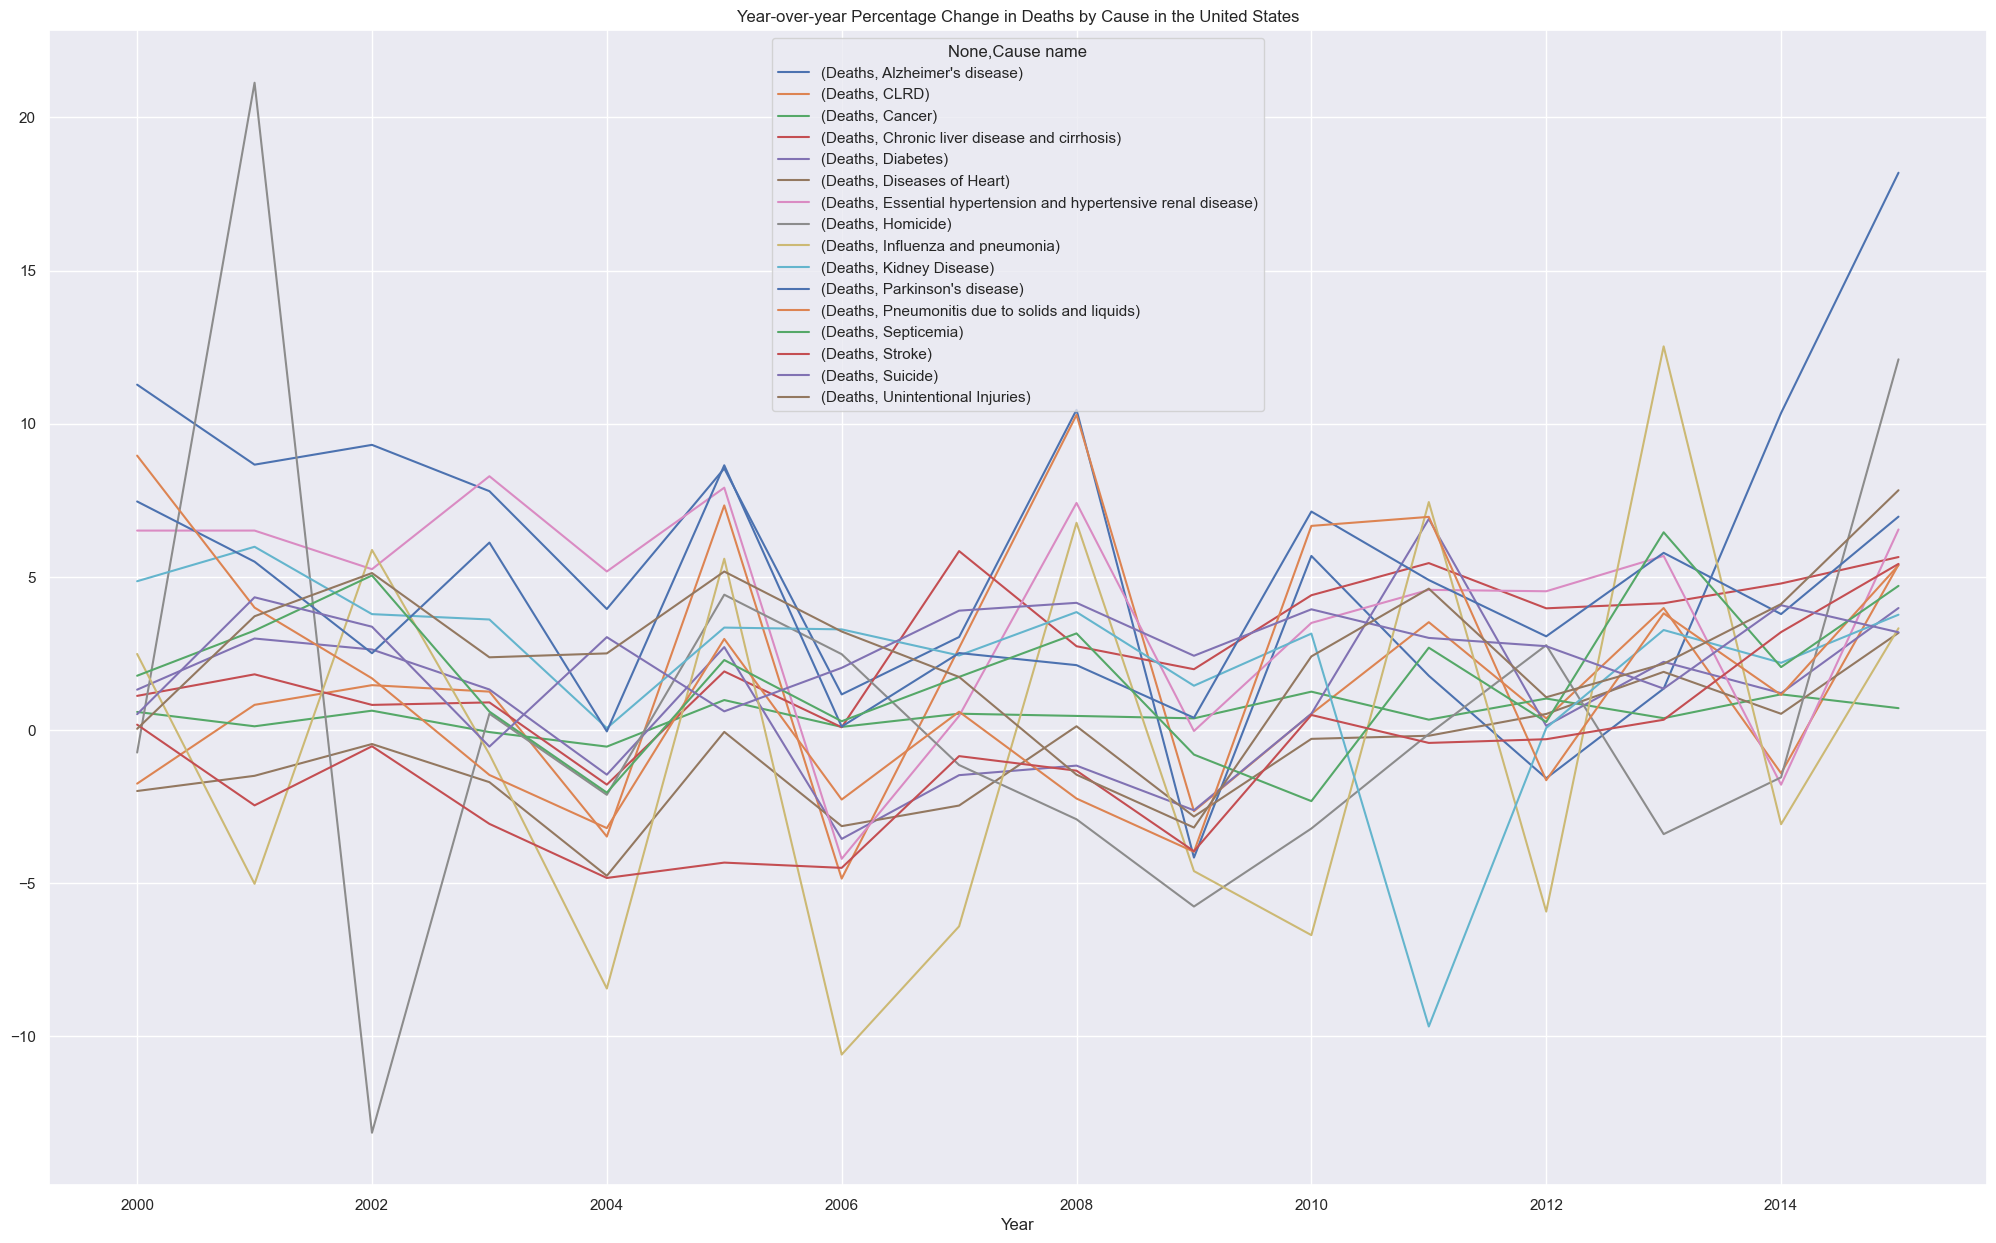

In [119]:
us_year_x_cause_pct.plot(kind='line', figsize=(25, 15), title='Year-over-year Percentage Change in Deaths by Cause in the United States')
# not much of a clear story here

<AxesSubplot:title={'center':'Total Deaths by State'}, xlabel='State'>

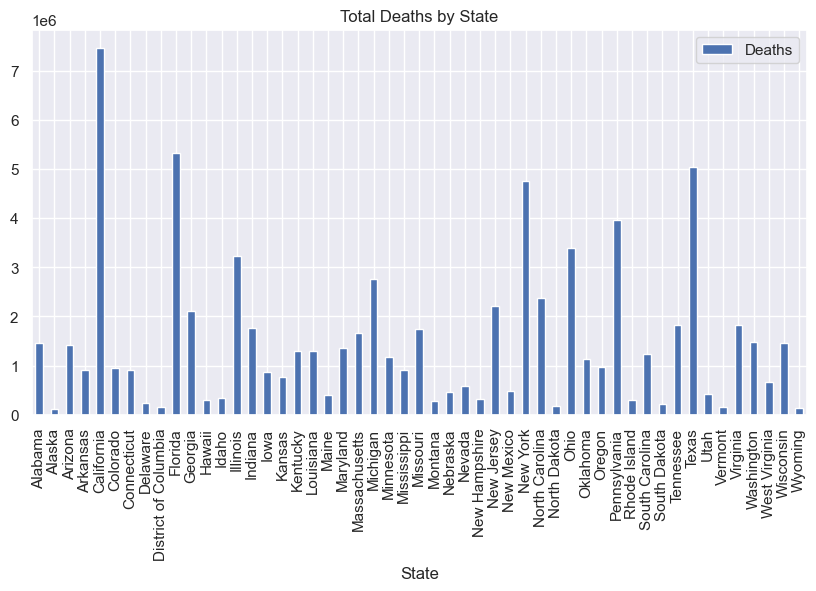

In [115]:
# total all deaths by state for all years
state_death_data = data.groupby('State')['Deaths'].sum().to_frame()
# drop the 'United States' row
state_death_data = state_death_data.drop('United States')

state_death_data.plot(kind='bar', figsize=(10, 5), title='Total Deaths by State')


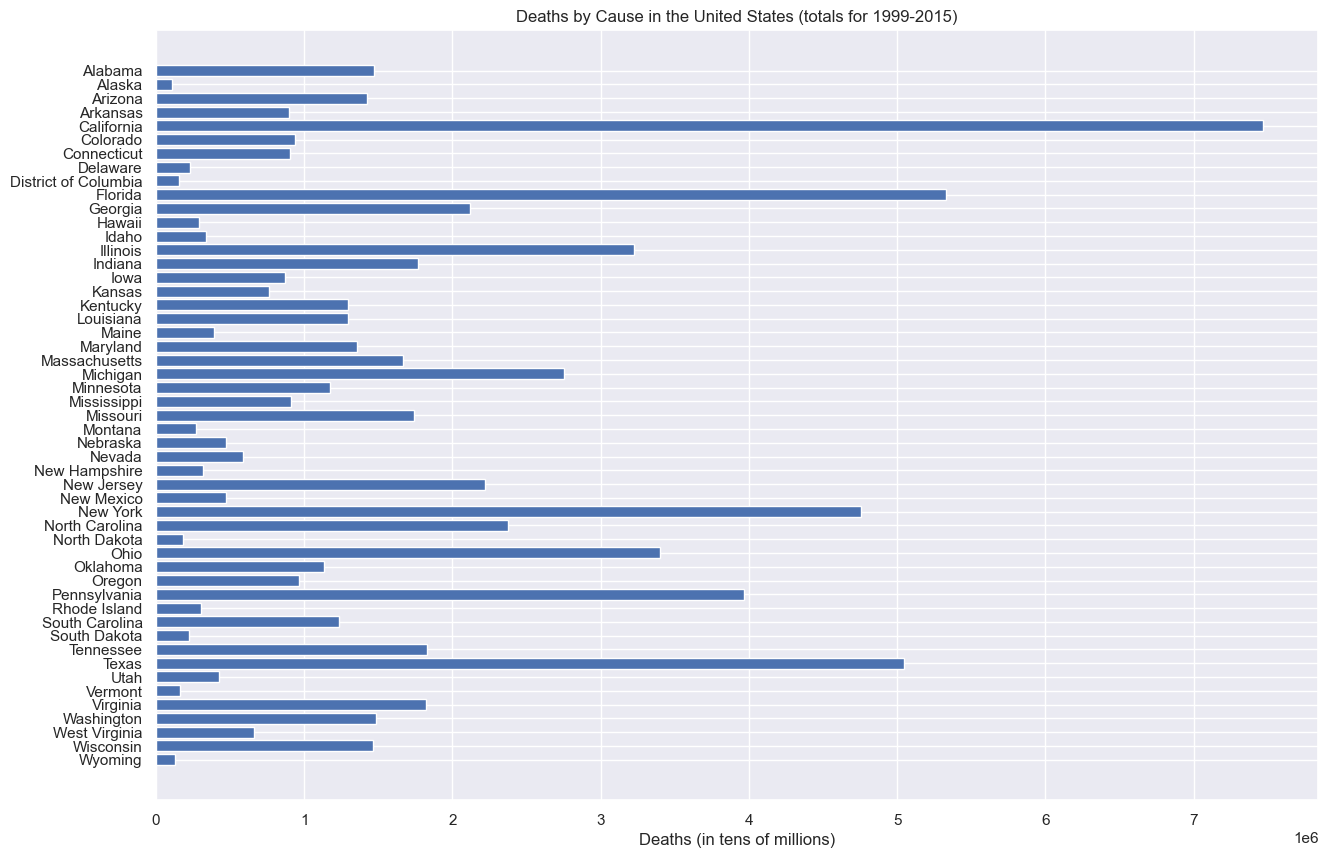

In [46]:
# rotate the above chart to make the labels easier to read
# first re-sort so alpha order starts at the top
state_death_data = state_death_data.sort_values(by='State', ascending=False)
# barh = horizontal bar chart
fig, ax = plt.subplots()
ax.barh(state_death_data.index, state_death_data['Deaths'])
ax.set_title('Deaths by Cause in the United States (totals for 1999-2015)')
ax.set_xlabel("Deaths (in tens of millions)")
plt.show()

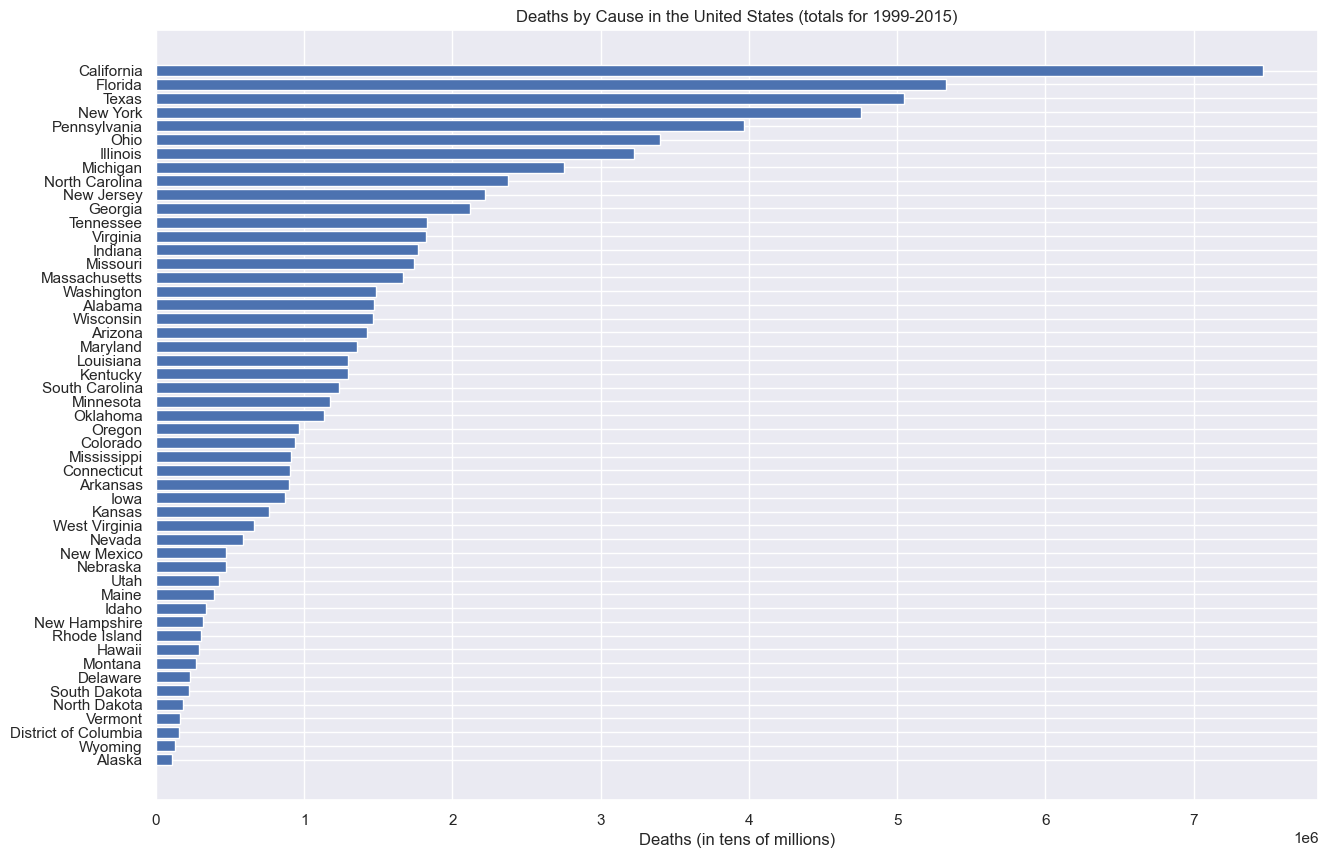

In [47]:
# re-sort so most deaths are at the top
state_death_data = state_death_data.sort_values(by='Deaths', ascending=True)
# barh = horizontal bar chart
fig, ax = plt.subplots()
ax.barh(state_death_data.index, state_death_data['Deaths'])
ax.set_title('Deaths by Cause in the United States (totals for 1999-2015)')
ax.set_xlabel("Deaths (in tens of millions)")
plt.show()

In [48]:
data['Year'].value_counts()

1999    884
2011    884
2012    884
2009    884
2014    884
2008    884
2007    884
2013    884
2004    884
2003    884
2010    884
2002    884
2006    884
2001    884
2005    884
2000    884
2015    884
Name: Year, dtype: int64

In [49]:
# remove US totals
states = data[data['State'] != 'United States']

# show the counts for each year as a reference for more filtering
states['Year'].value_counts()


1999    867
2011    867
2012    867
2009    867
2014    867
2008    867
2007    867
2013    867
2004    867
2003    867
2010    867
2002    867
2006    867
2001    867
2005    867
2000    867
2015    867
Name: Year, dtype: int64

In [50]:
# remove "All Causes" rows
states = states[states['Cause name'] != 'All Causes']

# show the counts again to show that some rows are gone
states['Year'].value_counts()

1999    816
2008    816
2014    816
2013    816
2012    816
2011    816
2010    816
2009    816
2007    816
2000    816
2006    816
2005    816
2004    816
2003    816
2002    816
2001    816
2015    816
Name: Year, dtype: int64

In [51]:
# group by state and year to have easy access to state Death data by year

states_by_year = states.groupby(['State', 'Year', 'Cause name'])['Deaths'].sum().unstack()
del states_by_year['All Causes']
states_by_year.head(10)

Cause name    Alzheimer's disease    CLRD   Cancer  \
State   Year                                         
Alabama 1999                772.0  2179.0   9506.0   
        2000                895.0  2057.0   9807.0   
        2001               1103.0  2204.0   9801.0   
        2002               1189.0  2328.0   9698.0   
        2003               1268.0  2434.0   9812.0   
        2004               1385.0  2361.0   9756.0   
        2005               1501.0  2382.0   9913.0   
        2006               1497.0  2309.0   9899.0   
        2007               1517.0  2530.0  10025.0   
        2008               1518.0  2733.0  10182.0   

Cause name    Chronic liver disease and cirrhosis  Diabetes  \
State   Year                                                  
Alabama 1999                                412.0    1341.0   
        2000                                407.0    1321.0   
        2001                                445.0    1344.0   
        2002                                425.0    1486.0   
        2003                                440.0    1414.0   
        2004                                477.0    1449.0   
        2005                                478.0    1429.0   
        2006                                489.0    1453.0   
        2007                                505.0    1313.0   
        2008                                489.0    1386.0   

Cause name    Diseases of Heart  \
State   Year                      
Alabama 1999            13419.0   
        2000            13406.0   
        2001            13207.0   
        2002            13197.0   
        2003            13150.0   
        2004            12774.0   
        2005            12869.0   
        2006            12583.0   
        2007            11926.0   
        2008            12074.0   

Cause name    Essential hypertension and hypertensive renal disease  Homicide  \
State   Year                                                                    
Alabama 1999                                              313.0         438.0   
        2000                                              291.0         444.0   
        2001                                              369.0         425.0   
        2002                                              343.0         416.0   
        2003                                              402.0         434.0   
        2004                                              413.0         369.0   
        2005                                              428.0         433.0   
        2006                                              456.0         445.0   
        2007                                              475.0         480.0   
        2008                                              501.0         454.0   

Cause name    Influenza and pneumonia  Kidney Disease  Parkinson's disease  \
State   Year                                                                 
Alabama 1999                   1228.0           979.0                207.0   
        2000                   1138.0           939.0                214.0   
        2001                   1105.0           974.0                239.0   
        2002                   1218.0          1032.0                232.0   
        2003                   1157.0          1062.0                265.0   
        2004                    994.0          1049.0                256.0   
        2005                   1011.0          1036.0                306.0   
        2006                    918.0          1104.0                291.0   
        2007                    898.0          1051.0                321.0   
        2008                    912.0          1107.0                348.0   

Cause name    Pneumonitis due to solids and liquids  Septicemia  Stroke  \
State   Year                                                              
Alabama 1999                                  306.0       691.0  3148.0   
        2000                          

In [52]:
# Add a yearly total column to prepare to calculate percentages
states_by_year['Total'] = states_by_year.sum(axis=1)
states_by_year.head(10)

Cause name    Alzheimer's disease    CLRD   Cancer  \
State   Year                                         
Alabama 1999                772.0  2179.0   9506.0   
        2000                895.0  2057.0   9807.0   
        2001               1103.0  2204.0   9801.0   
        2002               1189.0  2328.0   9698.0   
        2003               1268.0  2434.0   9812.0   
        2004               1385.0  2361.0   9756.0   
        2005               1501.0  2382.0   9913.0   
        2006               1497.0  2309.0   9899.0   
        2007               1517.0  2530.0  10025.0   
        2008               1518.0  2733.0  10182.0   

Cause name    Chronic liver disease and cirrhosis  Diabetes  \
State   Year                                                  
Alabama 1999                                412.0    1341.0   
        2000                                407.0    1321.0   
        2001                                445.0    1344.0   
        2002                                425.0    1486.0   
        2003                                440.0    1414.0   
        2004                                477.0    1449.0   
        2005                                478.0    1429.0   
        2006                                489.0    1453.0   
        2007                                505.0    1313.0   
        2008                                489.0    1386.0   

Cause name    Diseases of Heart  \
State   Year                      
Alabama 1999            13419.0   
        2000            13406.0   
        2001            13207.0   
        2002            13197.0   
        2003            13150.0   
        2004            12774.0   
        2005            12869.0   
        2006            12583.0   
        2007            11926.0   
        2008            12074.0   

Cause name    Essential hypertension and hypertensive renal disease  Homicide  \
State   Year                                                                    
Alabama 1999                                              313.0         438.0   
        2000                                              291.0         444.0   
        2001                                              369.0         425.0   
        2002                                              343.0         416.0   
        2003                                              402.0         434.0   
        2004                                              413.0         369.0   
        2005                                              428.0         433.0   
        2006                                              456.0         445.0   
        2007                                              475.0         480.0   
        2008                                              501.0         454.0   

Cause name    Influenza and pneumonia  Kidney Disease  Parkinson's disease  \
State   Year                                                                 
Alabama 1999                   1228.0           979.0                207.0   
        2000                   1138.0           939.0                214.0   
        2001                   1105.0           974.0                239.0   
        2002                   1218.0          1032.0                232.0   
        2003                   1157.0          1062.0                265.0   
        2004                    994.0          1049.0                256.0   
        2005                   1011.0          1036.0                306.0   
        2006                    918.0          1104.0                291.0   
        2007                    898.0          1051.0                321.0   
        2008                    912.0          1107.0                348.0   

Cause name    Pneumonitis due to solids and liquids  Septicemia  Stroke  \
State   Year                                                              
Alabama 1999                                  306.0       691.0  3148.0   
        2000                          

In [53]:
states_by_year.index

MultiIndex([('Alabama', 1999),
            ('Alabama', 2000),
            ('Alabama', 2001),
            ('Alabama', 2002),
            ('Alabama', 2003),
            ('Alabama', 2004),
            ('Alabama', 2005),
            ('Alabama', 2006),
            ('Alabama', 2007),
            ('Alabama', 2008),
            ...
            ('Wyoming', 2006),
            ('Wyoming', 2007),
            ('Wyoming', 2008),
            ('Wyoming', 2009),
            ('Wyoming', 2010),
            ('Wyoming', 2011),
            ('Wyoming', 2012),
            ('Wyoming', 2013),
            ('Wyoming', 2014),
            ('Wyoming', 2015)],
           names=['State', 'Year'], length=884)

In [54]:
# get the data just for California, for example
states_by_year.loc['California']

Cause name,Alzheimer's disease,CLRD,Cancer,Chronic liver disease and cirrhosis,Diabetes,Diseases of Heart,Essential hypertension and hypertensive renal disease,Homicide,Influenza and pneumonia,Kidney Disease,Parkinson's disease,Pneumonitis due to solids and liquids,Septicemia,Stroke,Suicide,Unintentional Injuries,Total
Year,,,,,,,,,,,,,,,,,
1999,4532.0,13165.0,53067.0,3572.0,6401.0,71930.0,2029.0,2066.0,4560.0,2261.0,1577.0,355.0,756.0,17962.0,3077.0,9198.0,196508.0
2000,4419.0,12756.0,53158.0,3666.0,6190.0,68426.0,2016.0,2064.0,8324.0,1785.0,1484.0,910.0,807.0,18185.0,2969.0,8577.0,195736.0
2001,4935.0,12965.0,53924.0,3692.0,6395.0,68234.0,2339.0,2223.0,8129.0,1994.0,1512.0,997.0,854.0,18088.0,2831.0,8132.0,197244.0
2002,5421.0,12684.0,54143.0,3747.0,6807.0,68797.0,2337.0,2485.0,8128.0,2164.0,1582.0,987.0,941.0,17626.0,3228.0,10107.0,201184.0
2003,6585.0,13448.0,54319.0,3833.0,7093.0,68864.0,2586.0,2487.0,8185.0,2334.0,1803.0,934.0,978.0,17692.0,3397.0,10471.0,205009.0
2004,6964.0,12522.0,53700.0,3703.0,7117.0,64999.0,2859.0,2490.0,7323.0,2373.0,1832.0,951.0,931.0,16882.0,3368.0,10633.0,198647.0
2005,7706.0,13188.0,54732.0,3822.0,7697.0,64916.0,3034.0,2540.0,7553.0,2482.0,1905.0,826.0,1033.0,15585.0,3206.0,11129.0,201354.0
2006,8146.0,12829.0,54140.0,3840.0,7376.0,64871.0,3162.0,2616.0,7338.0,2676.0,1948.0,888.0,1058.0,15039.0,3334.0,11375.0,200636.0
2007,8497.0,12532.0,55011.0,4065.0,7413.0,61690.0,3193.0,2376.0,6546.0,2835.0,1992.0,903.0,1073.0,14557.0,3602.0,11614.0,197899.0


<AxesSubplot:title={'center':'Total Deaths by Cause for California'}, xlabel='Year'>

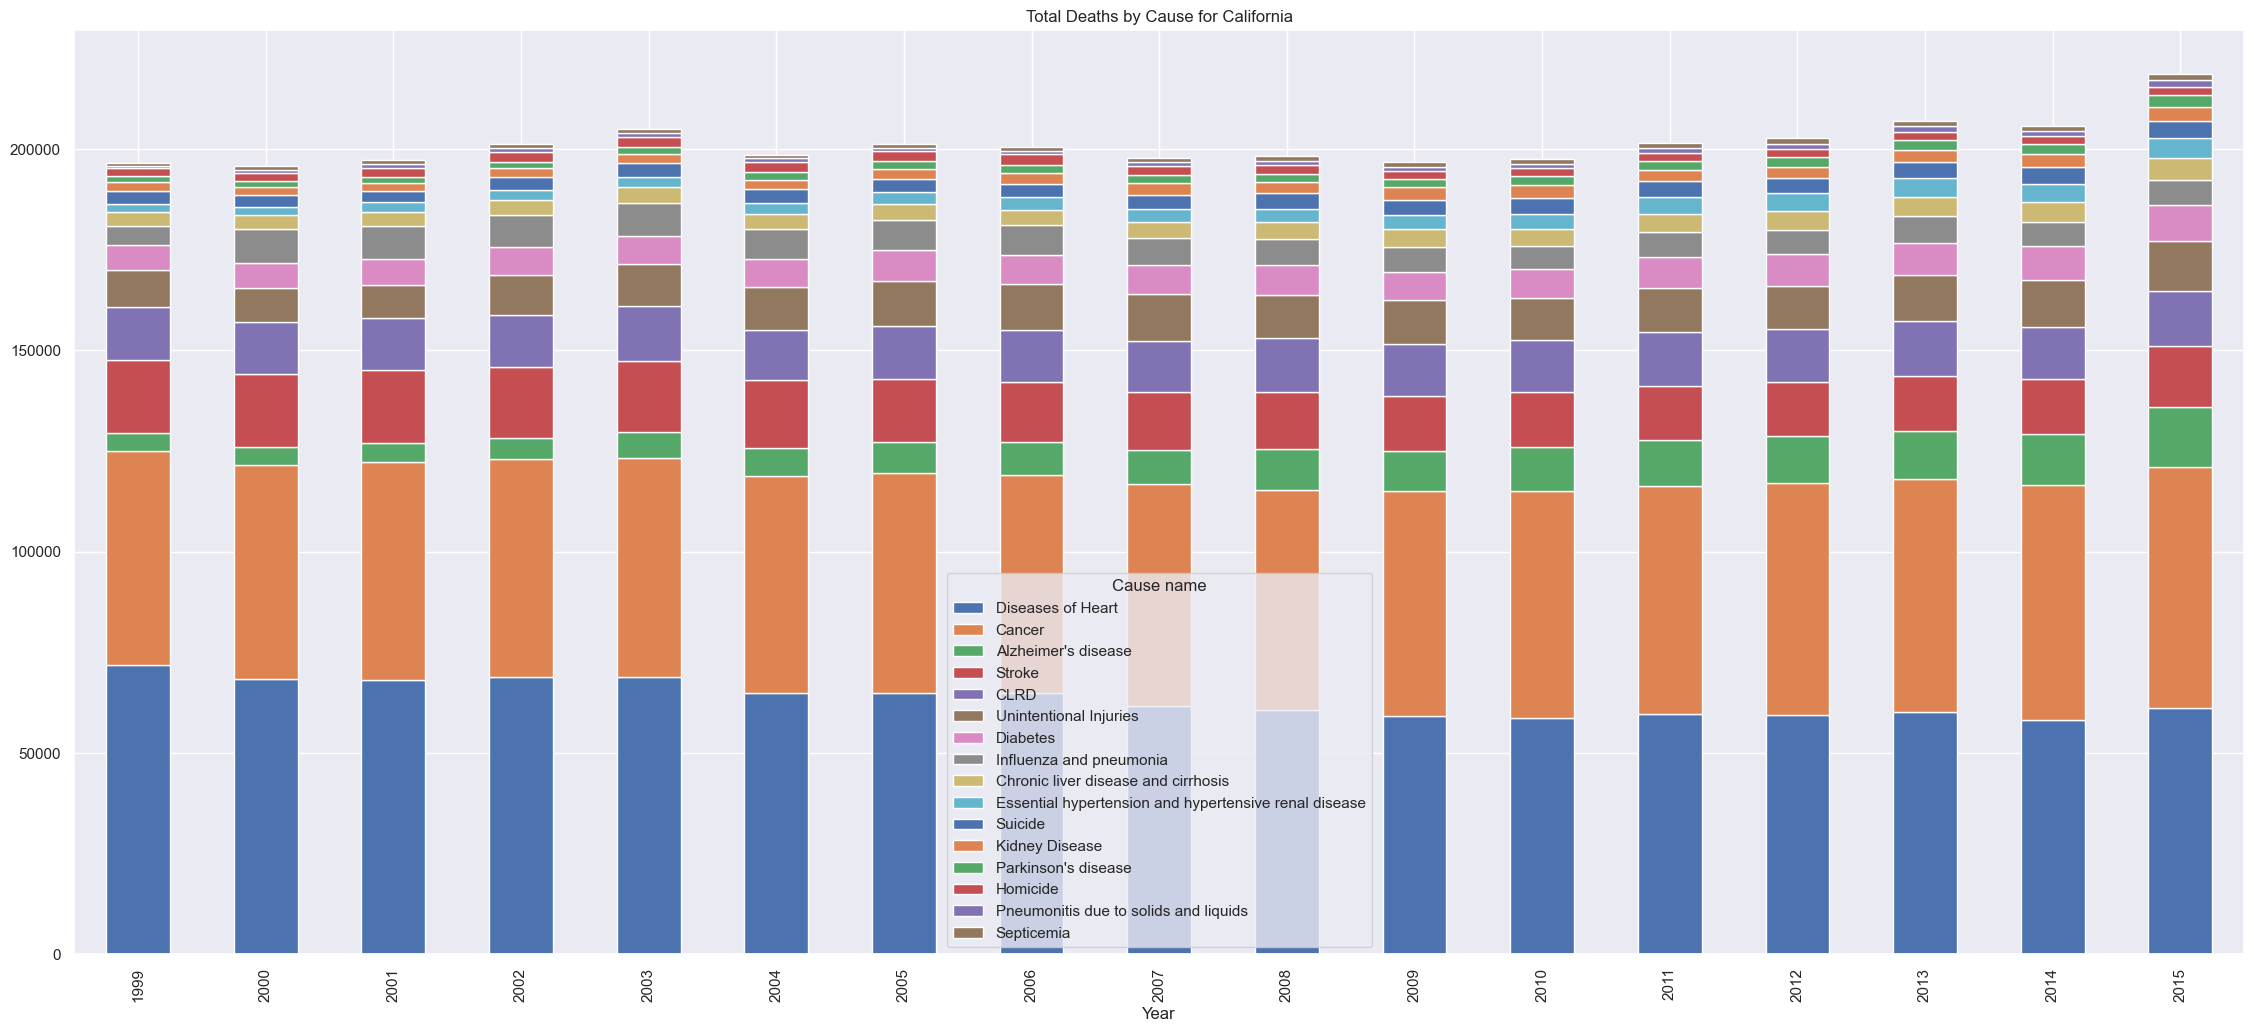

In [55]:
# create a stacked bar chart for California, each bar is a year and each stack is a cause
ca = states_by_year.loc['California']
ca = ca.drop('Total', axis=1)
# sort the columns by the 2015 values so the largest values are at the bottom
ca = ca.sort_values(by=2015, axis=1, ascending=False)  # type: ignore
ca.plot(kind='bar', stacked=True, figsize=(28, 12), title='Total Deaths by Cause for California')

<AxesSubplot:title={'center':'Total Deaths by Cause for California in 2015'}, ylabel='2015'>

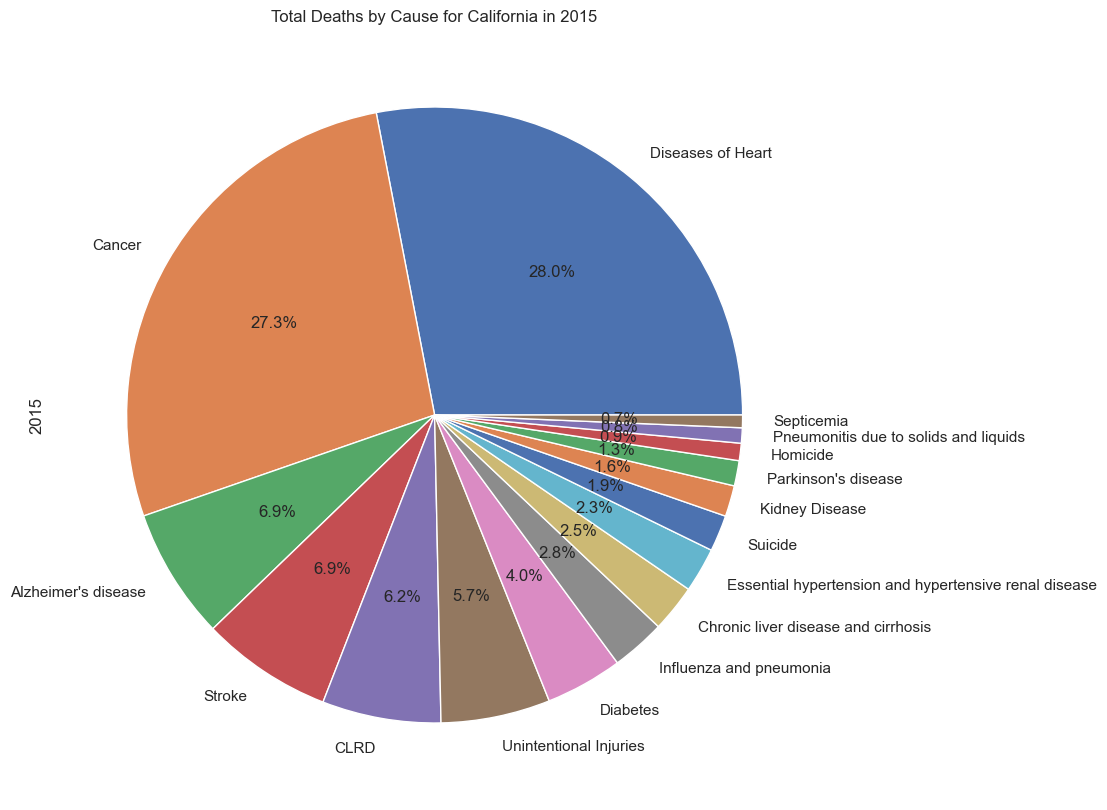

In [56]:
# create a pie chart of causes of death for California in 2015
ca.loc[2015].plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Total Deaths by Cause for California in 2015')

In [57]:
# create a new dataframe for *percentages* of deaths by cause, still separated by state and year
states_by_year_pct = states_by_year.div(states_by_year['Total'], axis=0)
states_by_year_pct.head(10)

Cause name    Alzheimer's disease      CLRD    Cancer  \
State   Year                                            
Alabama 1999             0.020419  0.057635  0.251435   
        2000             0.023651  0.054358  0.259156   
        2001             0.029028  0.058003  0.257935   
        2002             0.030807  0.060319  0.251276   
        2003             0.032740  0.062847  0.253350   
        2004             0.036203  0.061716  0.255019   
        2005             0.038652  0.061338  0.255266   
        2006             0.039006  0.060163  0.257928   
        2007             0.039943  0.066616  0.263962   
        2008             0.039088  0.070375  0.262186   

Cause name    Chronic liver disease and cirrhosis  Diabetes  \
State   Year                                                  
Alabama 1999                             0.010897  0.035470   
        2000                             0.010755  0.034908   
        2001                             0.011711  0.035370   
        2002                             0.011012  0.038502   
        2003                             0.011361  0.036510   
        2004                             0.012469  0.037876   
        2005                             0.012309  0.036798   
        2006                             0.012741  0.037859   
        2007                             0.013297  0.034572   
        2008                             0.012592  0.035689   

Cause name    Diseases of Heart  \
State   Year                      
Alabama 1999           0.354934   
        2000           0.354262   
        2001           0.347571   
        2002           0.341935   
        2003           0.339539   
        2004           0.333908   
        2005           0.331385   
        2006           0.327862   
        2007           0.314016   
        2008           0.310905   

Cause name    Essential hypertension and hypertensive renal disease  Homicide  \
State   Year                                                                    
Alabama 1999                                           0.008279      0.011585   
        2000                                           0.007690      0.011733   
        2001                                           0.009711      0.011185   
        2002                                           0.008887      0.010779   
        2003                                           0.010380      0.011206   
        2004                                           0.010796      0.009646   
        2005                                           0.011021      0.011150   
        2006                                           0.011881      0.011595   
        2007                                           0.012507      0.012639   
        2008                                           0.012901      0.011690   

Cause name    Influenza and pneumonia  Kidney Disease  Parkinson's disease  \
State   Year                                                                 
Alabama 1999                 0.032481        0.025895             0.005475   
        2000                 0.030072        0.024814             0.005655   
        2001                 0.029080        0.025633             0.006290   
        2002                 0.031558        0.026739             0.006011   
        2003                 0.029874        0.027421             0.006842   
        2004                 0.025983        0.027421             0.006692   
        2005                 0.026034        0.026678             0.007880   
        2006                 0.023919        0.028766             0.007582   
        2007                 0.023645        0.027673             0.008452   
        2008                 0.023484        0.028505             0.008961   

Cause name    Pneumonitis due to solids and liquids  Septicemia    Stroke  \
State   Year                                                                
Alabama 1999                               0.008094    0.018277  0.083265

In [58]:
heart = states_by_year_pct['Diseases of Heart'].to_frame()
heart.loc['United States']


,Diseases of Heart
Year,
1999,NaN
2000,NaN
2001,NaN
2002,NaN
2003,NaN
2004,NaN
2005,NaN
2006,NaN
2007,NaN


In [59]:
heart.index

MultiIndex([('Alabama', 1999),
            ('Alabama', 2000),
            ('Alabama', 2001),
            ('Alabama', 2002),
            ('Alabama', 2003),
            ('Alabama', 2004),
            ('Alabama', 2005),
            ('Alabama', 2006),
            ('Alabama', 2007),
            ('Alabama', 2008),
            ...
            ('Wyoming', 2006),
            ('Wyoming', 2007),
            ('Wyoming', 2008),
            ('Wyoming', 2009),
            ('Wyoming', 2010),
            ('Wyoming', 2011),
            ('Wyoming', 2012),
            ('Wyoming', 2013),
            ('Wyoming', 2014),
            ('Wyoming', 2015)],
           names=['State', 'Year'], length=884)

In [60]:
heart.drop('United States', level=0, axis=0, inplace=True)
heart.index


MultiIndex([('Alabama', 1999),
            ('Alabama', 2000),
            ('Alabama', 2001),
            ('Alabama', 2002),
            ('Alabama', 2003),
            ('Alabama', 2004),
            ('Alabama', 2005),
            ('Alabama', 2006),
            ('Alabama', 2007),
            ('Alabama', 2008),
            ...
            ('Wyoming', 2006),
            ('Wyoming', 2007),
            ('Wyoming', 2008),
            ('Wyoming', 2009),
            ('Wyoming', 2010),
            ('Wyoming', 2011),
            ('Wyoming', 2012),
            ('Wyoming', 2013),
            ('Wyoming', 2014),
            ('Wyoming', 2015)],
           names=['State', 'Year'], length=867)

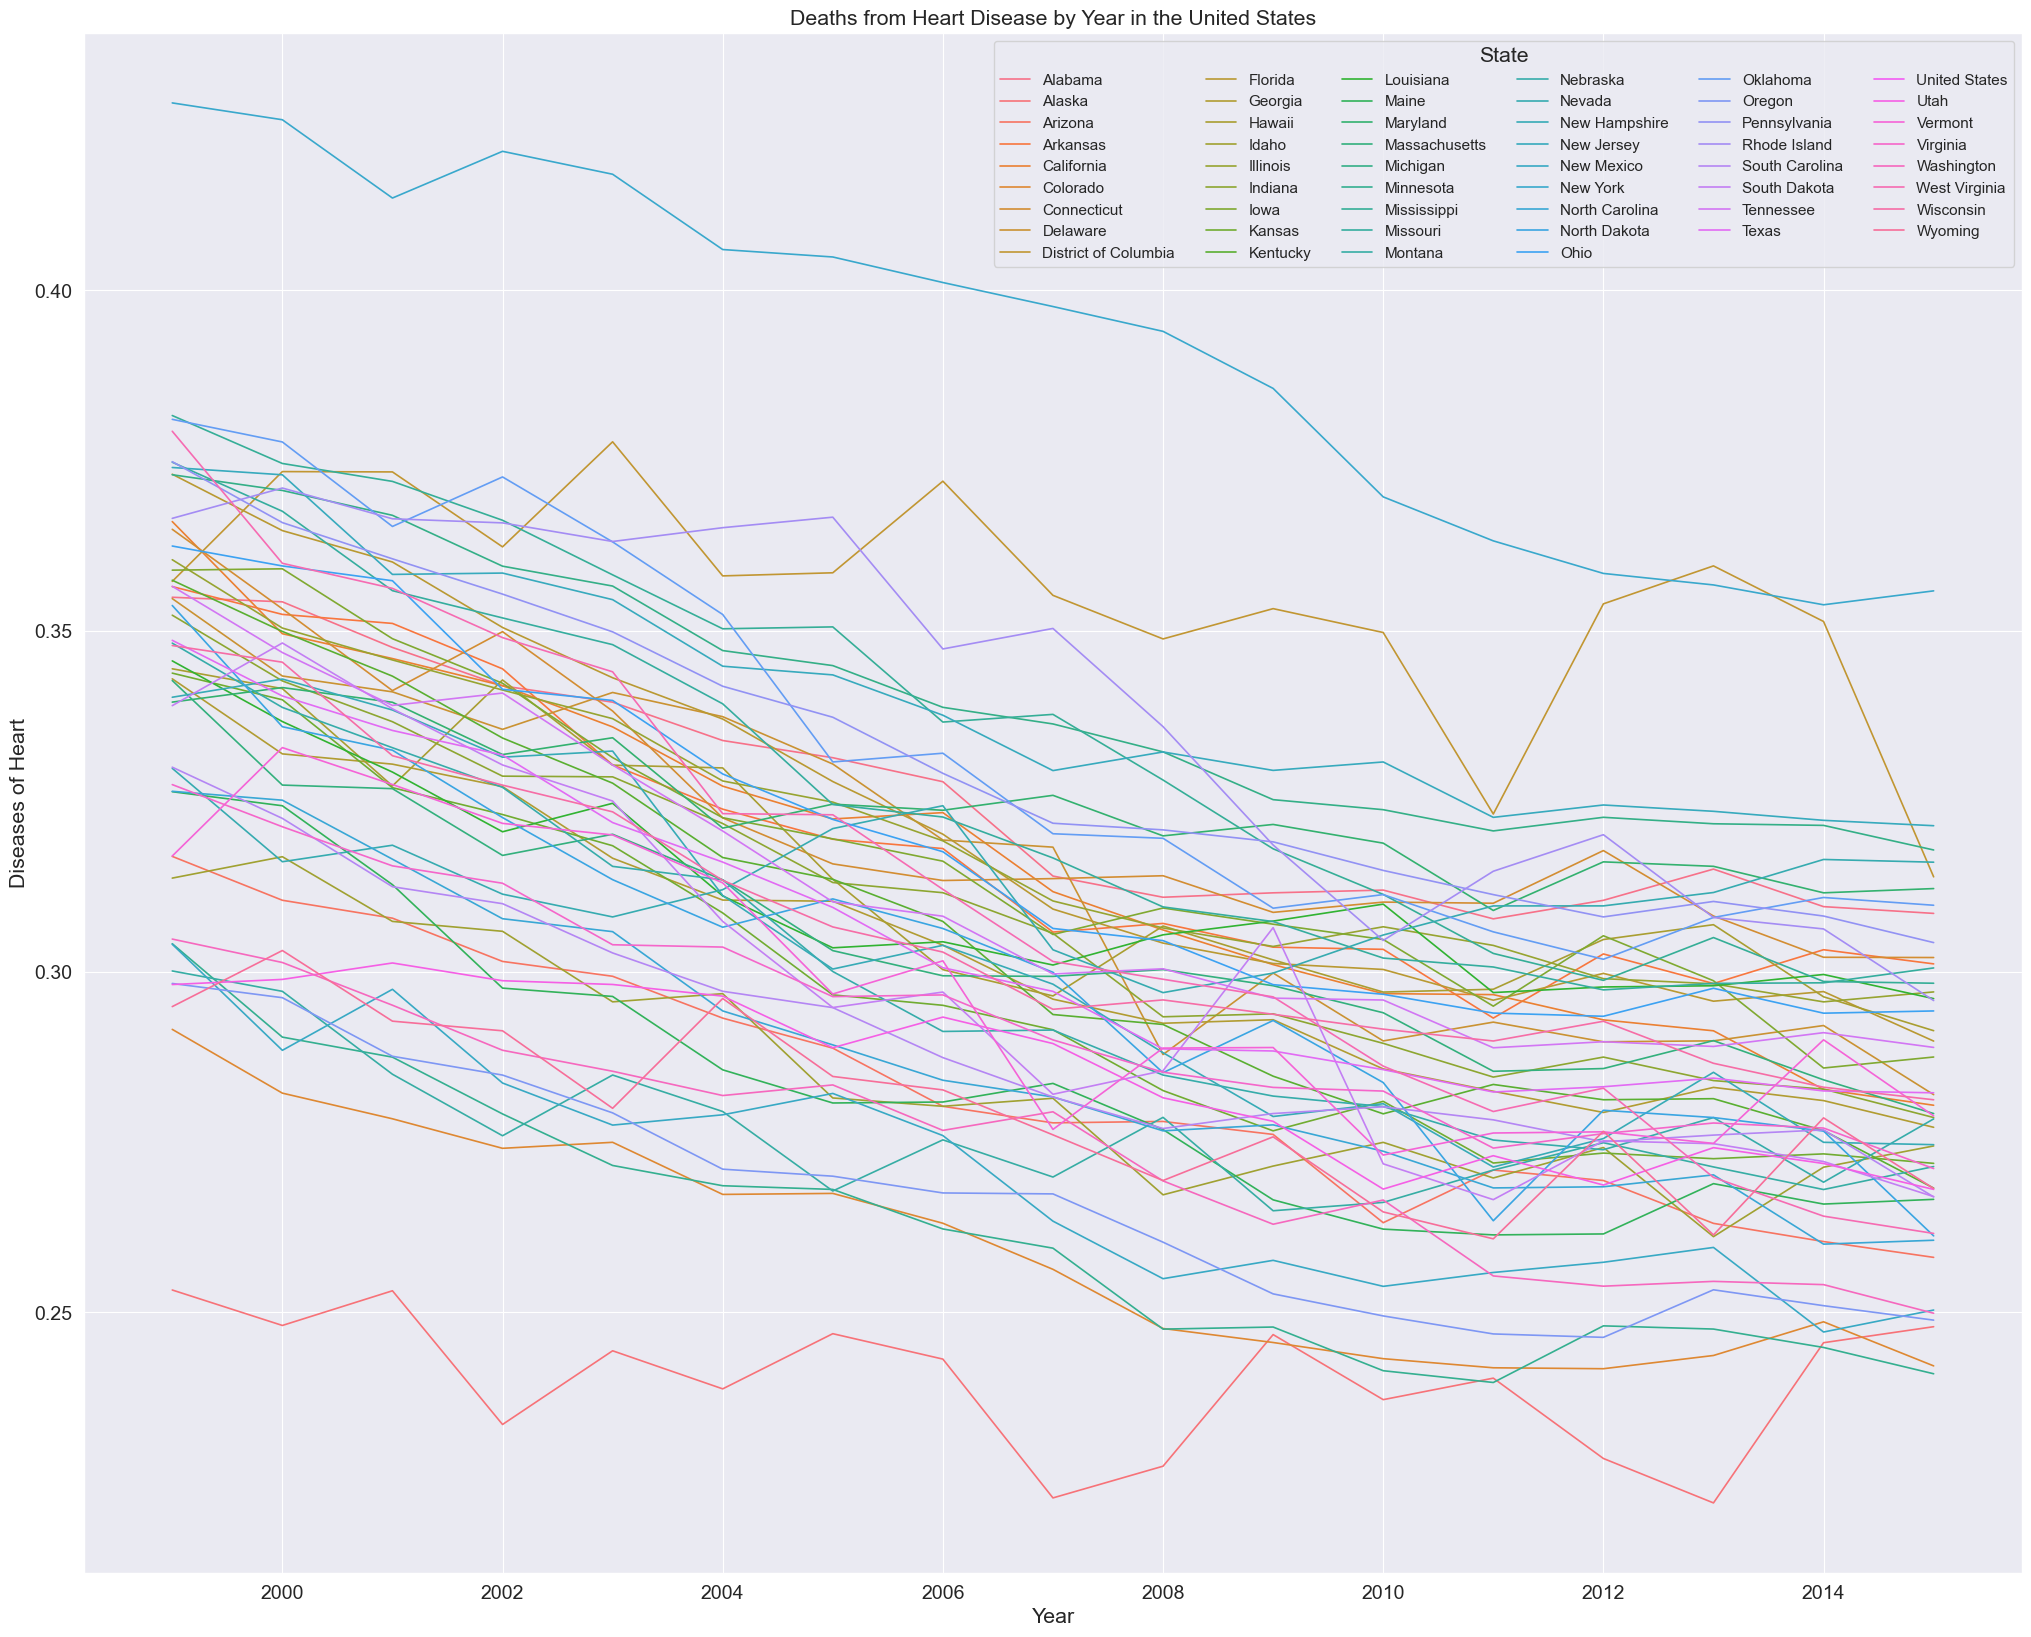

In [76]:
# line chart with one line for each state's percentage of deaths by heart disease over time
# I cannot figure out how to get rid of the 'United States' line, which is all NaNs per above checks
sns.set_context('paper', font_scale=1.6)
ax = sns.lineplot(data=heart, x='Year', y=heart['Diseases of Heart'], hue='State')
ax.set_title('Deaths from Heart Disease by Year in the United States')
sns.set(rc={"figure.figsize":(25, 20)})
sns.move_legend(ax, 'upper right', ncol=6)



In [62]:
states_by_year_pct.describe()


Cause name,Alzheimer's disease,CLRD,Cancer,Chronic liver disease and cirrhosis,Diabetes,Diseases of Heart,Essential hypertension and hypertensive renal disease,Homicide,Influenza and pneumonia,Kidney Disease,Parkinson's disease,Pneumonitis due to solids and liquids,Septicemia,Stroke,Suicide,Unintentional Injuries,Total
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.0
mean,0.037484,0.067889,0.278898,0.015003,0.036018,0.306030,0.011239,0.007960,0.028298,0.021461,0.010376,0.008863,0.016574,0.070648,0.019910,0.063349,1.0
std,0.012354,0.012083,0.016128,0.004538,0.005611,0.033554,0.003383,0.005611,0.006059,0.006156,0.002851,0.002390,0.006253,0.011359,0.008196,0.016197,0.0
min,0.009834,0.028926,0.230259,0.007363,0.019022,0.222013,0.000000,0.000000,0.012013,0.004814,0.004269,0.000000,0.003847,0.048522,0.004890,0.027986,1.0
25%,0.029131,0.059944,0.268171,0.012006,0.032621,0.281593,0.008959,0.004427,0.024392,0.016688,0.008178,0.007300,0.011381,0.062874,0.015101,0.053758,1.0
50%,0.036305,0.067551,0.277929,0.013799,0.035684,0.303086,0.010780,0.006935,0.027831,0.021715,0.010216,0.008787,0.015992,0.068558,0.017730,0.061979,1.0
75%,0.044013,0.076055,0.288900,0.016966,0.039245,0.327366,0.013092,0.010212,0.031996,0.026445,0.012346,0.010193,0.021218,0.077287,0.021917,0.070372,1.0
max,0.083775,0.107709,0.328015,0.040388,0.054448,0.427488,0.023413,0.049804,0.062290,0.036710,0.020012,0.017847,0.033731,0.114939,0.062829,0.144836,1.0


In [63]:
# which causes have the highest standard deviation?
states_by_year_pct.std().sort_values(ascending=False).head()

Cause name
Diseases of Heart         0.033554
Unintentional Injuries    0.016197
Cancer                    0.016128
Alzheimer's disease       0.012354
CLRD                      0.012083
dtype: float64

<AxesSubplot:title={'center':'Percentages of Deaths by Cause for California'}, xlabel='Year'>

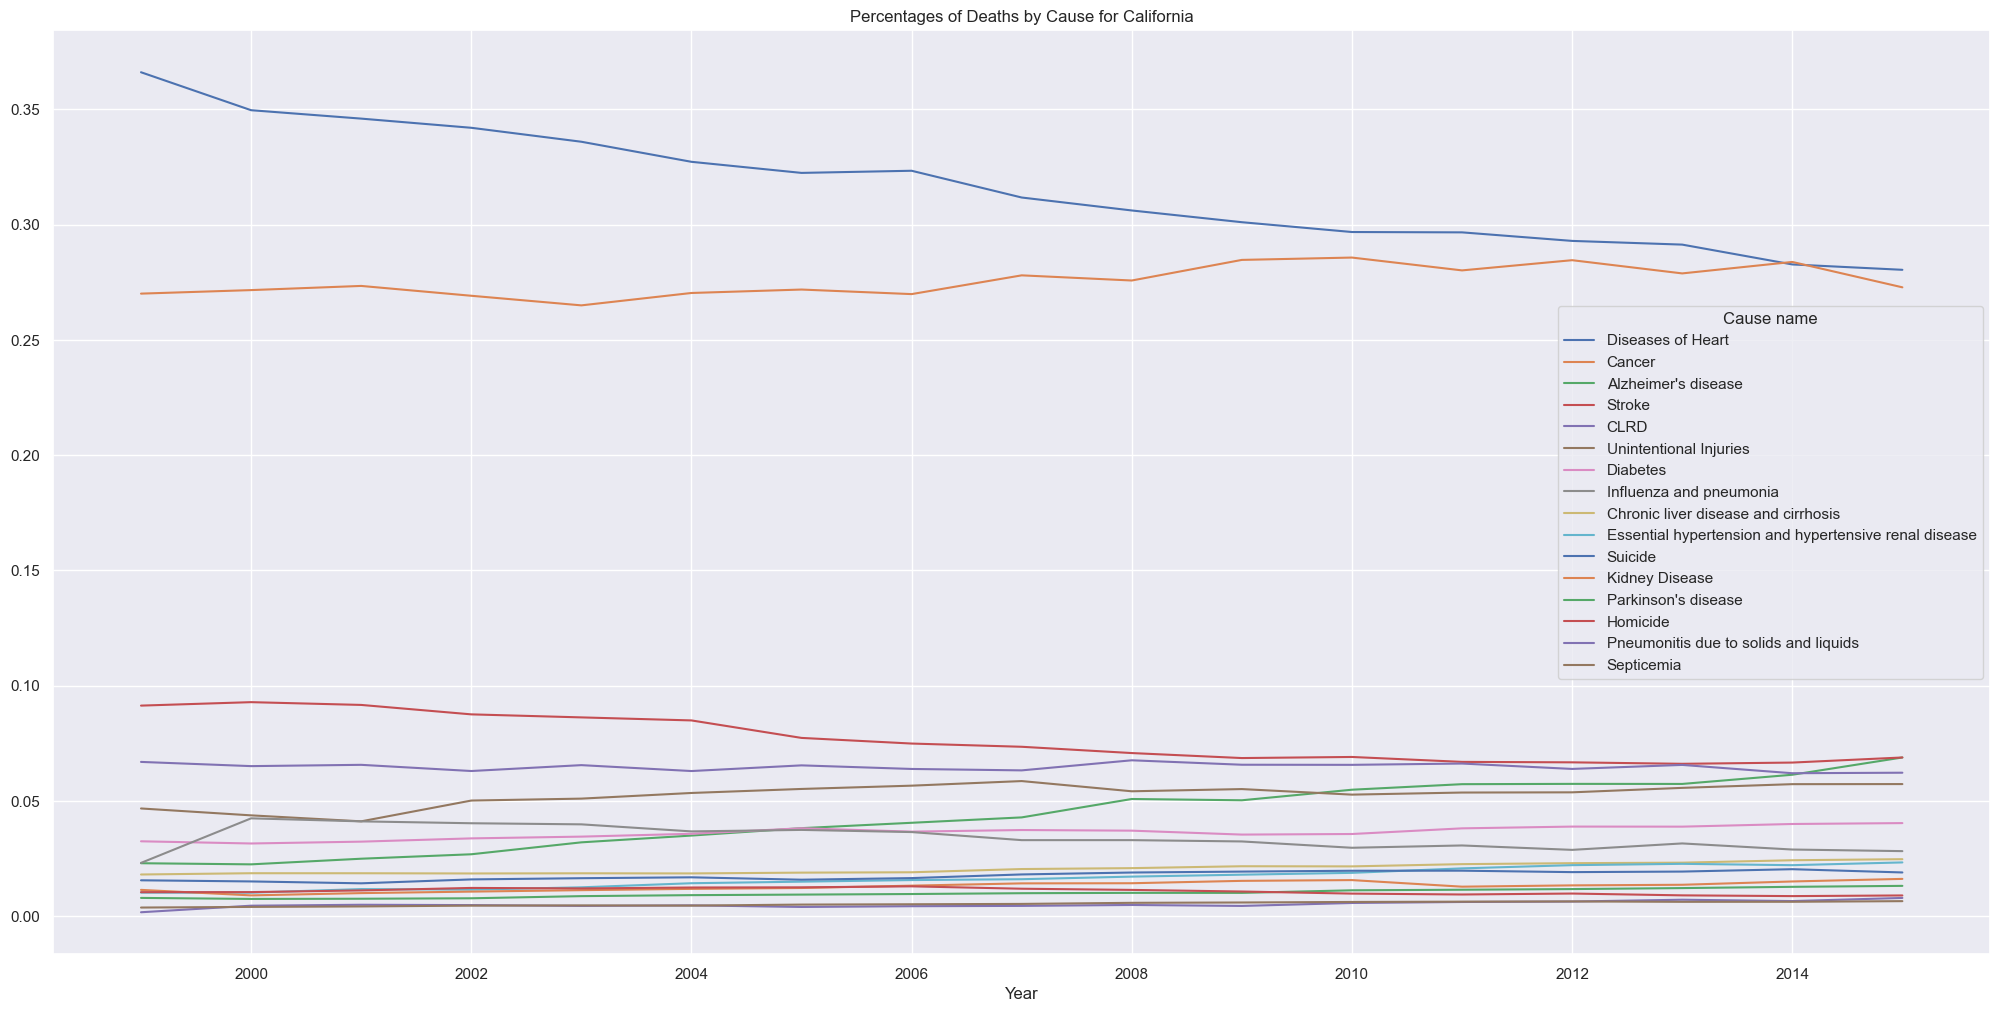

In [64]:
# create a line chart of the percentages of deaths by cause for California
ca_pct = states_by_year_pct.loc['California']
ca_pct = ca_pct.drop('Total', axis=1)
ca_pct = ca_pct.sort_values(by=2015, axis=1, ascending=False)  # type: ignore
ca_pct.plot(kind='line', figsize=(25, 12), title='Percentages of Deaths by Cause for California')


In [65]:
# reverse index, sort by year first, then by state
years_by_state = states.groupby(['Year', 'State', 'Cause name'])['Deaths'].sum().unstack()
del years_by_state['All Causes']
# example year output
years_by_state.query("Year == 2015") 

Cause name                 Alzheimer's disease     CLRD   Cancer  \
Year State                                                         
2015 Alabama                            2282.0   3279.0  10354.0   
     Alaska                               68.0    204.0    978.0   
     Arizona                            2943.0   3681.0  11776.0   
     Arkansas                           1457.0   2270.0   6727.0   
     California                        15065.0  13621.0  59629.0   
     Colorado                           1612.0   2577.0   7604.0   
     Connecticut                         966.0   1369.0   6666.0   
     Delaware                            264.0    510.0   2010.0   
     District of Columbia                129.0    147.0   1072.0   
     Florida                            7031.0  11705.0  44027.0   
     Georgia                            3714.0   4607.0  16945.0   
     Hawaii                              422.0    332.0   2462.0   
     Idaho                               552.0    843.0   2849.0   
     Illinois                           3686.0   5544.0  24713.0   
     Indiana                            2513.0   4212.0  13511.0   
     Iowa                               1339.0   2011.0   6513.0   
     Kansas                              865.0   1704.0   5604.0   
     Kentucky                           1694.0   3331.0  10312.0   
     Louisiana                          2018.0   2178.0   9397.0   
     Maine                               544.0   1025.0   3398.0   
     Maryland                           1095.0   2040.0  10568.0   
     Massachusetts                      1815.0   2784.0  12750.0   
     Michigan                           3771.0   5848.0  20732.0   
     Minnesota                          1789.0   2351.0   9925.0   
     Mississippi                        1402.0   1924.0   6485.0   
     Missouri                           2173.0   3935.0  12965.0   
     Montana                             277.0    679.0   2130.0   
     Nebraska                            598.0   1174.0   3514.0   
     Nevada                              874.0   1617.0   5015.0   
     New Hampshire                       432.0    705.0   2773.0   
     New Jersey                         2260.0   3202.0  16270.0   
     New Mexico                          483.0   1109.0   3591.0   
     New York                           3174.0   7109.0  35089.0   
     North Carolina                     3803.0   5221.0  19322.0   
     North Dakota                        376.0    351.0   1320.0   
     Ohio                               4643.0   7211.0  25396.0   
     Oklahoma                           1498.0   2924.0   8280.0   
     Oregon                             1652.0   2119.0   8093.0   
     Pennsylvania                       4012.0   6664.0  28697.0   
     Rhode Island                        453.0    510.0   2226.0   
     South Carolina                     2453.0   2908.0   9950.0   
     South Dakota                        421.0    502.0   1640.0   
     Tennessee                          3122.0   4239.0  14214.0   
     Texas                              8903.0  10231.0  39121.0   
     United States                         0.0      0.0      0.0   
     Utah                                906.0    811.0   3091.0   
     Vermont                             298.0    357.0   1399.0   
     Virginia                           2248.0   3370.0  14947.0   
     Washington                         3490.0   3154.0  12687.0   
     West Virginia                       738.0   1628.0   4839.0   
     Wisconsin                          2087.0   2846.0  11423.0   
     Wyoming                             151.0    368.0    931.0   

Cause name                 Chronic liver disease and cirrhosis  Diabetes  \
Year State                                                                 
2015 Alabama                                             716.0    1255.0   
     Alaska                                              114.0     142.0   
     Arizona           

In [66]:
# add a Total column to prepare to calculate percentages
years_by_state['Total'] = years_by_state.sum(axis=1)
# divide columns by total to get percentages
years_by_state_pct = years_by_state.div(years_by_state['Total'], axis=0)
years_by_state_pct.head(10)


Cause name                 Alzheimer's disease      CLRD    Cancer  \
Year State                                                           
1999 Alabama                          0.020419  0.057635  0.251435   
     Alaska                           0.010796  0.065677  0.284750   
     Arizona                          0.028257  0.074912  0.264261   
     Arkansas                         0.018607  0.058223  0.263120   
     California                       0.023063  0.066995  0.270050   
     Colorado                         0.034328  0.086001  0.266222   
     Connecticut                      0.017951  0.057372  0.282025   
     Delaware                         0.018875  0.057682  0.306403   
     District of Columbia             0.011462  0.035900  0.289792   
     Florida                          0.022183  0.066217  0.279036   

Cause name                 Chronic liver disease and cirrhosis  Diabetes  \
Year State                                                                 
1999 Alabama                                          0.010897  0.035470   
     Alaska                                           0.020693  0.030139   
     Arizona                                          0.019161  0.031191   
     Arkansas                                         0.009347  0.029626   
     California                                       0.018177  0.032574   
     Colorado                                         0.017754  0.029015   
     Connecticut                                      0.012034  0.027627   
     Delaware                                         0.011995  0.031575   
     District of Columbia                             0.012327  0.047794   
     Florida                                          0.014301  0.031596   

Cause name                 Diseases of Heart  \
Year State                                     
1999 Alabama                        0.354934   
     Alaska                         0.253261   
     Arizona                        0.316901   
     Arkansas                       0.356500   
     California                     0.366041   
     Colorado                       0.291513   
     Connecticut                    0.364905   
     Delaware                       0.354736   
     District of Columbia           0.357266   
     Florida                        0.372991   

Cause name                 Essential hypertension and hypertensive renal disease  \
Year State                                                                         
1999 Alabama                                                        0.008279       
     Alaska                                                         0.000000       
     Arizona                                                        0.007042       
     Arkansas                                                       0.006431       
     California                                                     0.010325       
     Colorado                                                       0.006993       
     Connecticut                                                    0.009555       
     Delaware                                                       0.005116       
     District of Columbia                                           0.011894       
     Florida                                                        0.008535       

Cause name                 Homicide  Influenza and pneumonia  Kidney Disease  \
Year State                                                                     
1999 Alabama               0.011585                 0.032481        0.025895   
     Alaska                0.022942                 0.020693        0.015295   
     Arizona               0.013791                 0.037764        0.015962   
     Arkansas              0.007674                 0.031770        0.019636   
     California            0.010514                 0.023205        0.011506   
     Colorado              0.009036                 0.036644        0.014167   
     Connecticut    

In [67]:
years_by_state_pct.describe()

Cause name,Alzheimer's disease,CLRD,Cancer,Chronic liver disease and cirrhosis,Diabetes,Diseases of Heart,Essential hypertension and hypertensive renal disease,Homicide,Influenza and pneumonia,Kidney Disease,Parkinson's disease,Pneumonitis due to solids and liquids,Septicemia,Stroke,Suicide,Unintentional Injuries,Total
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.0
mean,0.037484,0.067889,0.278898,0.015003,0.036018,0.306030,0.011239,0.007960,0.028298,0.021461,0.010376,0.008863,0.016574,0.070648,0.019910,0.063349,1.0
std,0.012354,0.012083,0.016128,0.004538,0.005611,0.033554,0.003383,0.005611,0.006059,0.006156,0.002851,0.002390,0.006253,0.011359,0.008196,0.016197,0.0
min,0.009834,0.028926,0.230259,0.007363,0.019022,0.222013,0.000000,0.000000,0.012013,0.004814,0.004269,0.000000,0.003847,0.048522,0.004890,0.027986,1.0
25%,0.029131,0.059944,0.268171,0.012006,0.032621,0.281593,0.008959,0.004427,0.024392,0.016688,0.008178,0.007300,0.011381,0.062874,0.015101,0.053758,1.0
50%,0.036305,0.067551,0.277929,0.013799,0.035684,0.303086,0.010780,0.006935,0.027831,0.021715,0.010216,0.008787,0.015992,0.068558,0.017730,0.061979,1.0
75%,0.044013,0.076055,0.288900,0.016966,0.039245,0.327366,0.013092,0.010212,0.031996,0.026445,0.012346,0.010193,0.021218,0.077287,0.021917,0.070372,1.0
max,0.083775,0.107709,0.328015,0.040388,0.054448,0.427488,0.023413,0.049804,0.062290,0.036710,0.020012,0.017847,0.033731,0.114939,0.062829,0.144836,1.0


<AxesSubplot:title={'center':'Diseases of Heart'}, xlabel='[Year]'>

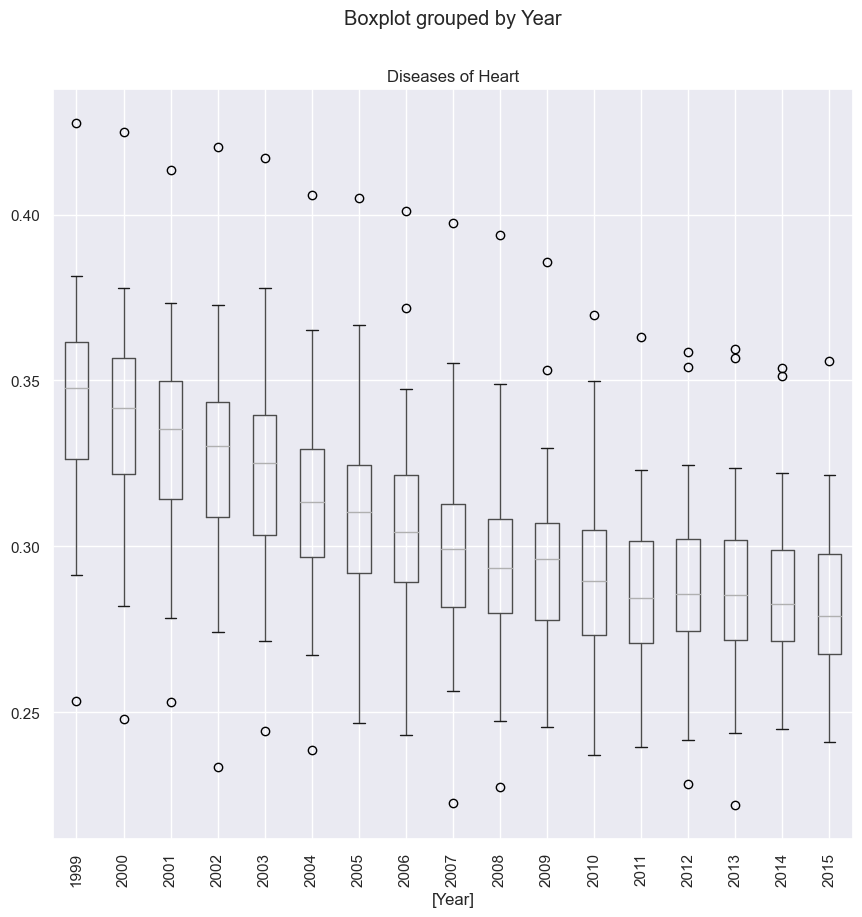

In [68]:
# box plot of Diseases of Heart by year for all states
heart_disease = years_by_state_pct.loc[:,'Diseases of Heart'].to_frame()
heart_disease.boxplot(by='Year', figsize=(10, 10), rot=90)

In [69]:
# list the top 5 states by percentage of deaths from Diseases of Heart for all years
(heart_disease.sort_values(['Year', 'Diseases of Heart'], ascending=[True, False])
   .groupby(level=0, as_index=False)
   .apply(lambda x: x.head(5) if len(x) >= 5 else x.head(0))
   .reset_index(level=0, drop=True)
)

Diseases of Heart
Year State                                  
1999 New York                       0.427488
     Mississippi                    0.381606
     Oklahoma                       0.381047
     West Virginia                  0.379295
     Pennsylvania                   0.374830
...                                      ...
2015 New York                       0.355873
     New Jersey                     0.321406
     Michigan                       0.317843
     Nevada                         0.316051
     District of Columbia           0.313903

[85 rows x 1 columns]

<AxesSubplot:title={'center':'Cancer'}, xlabel='[Year]'>

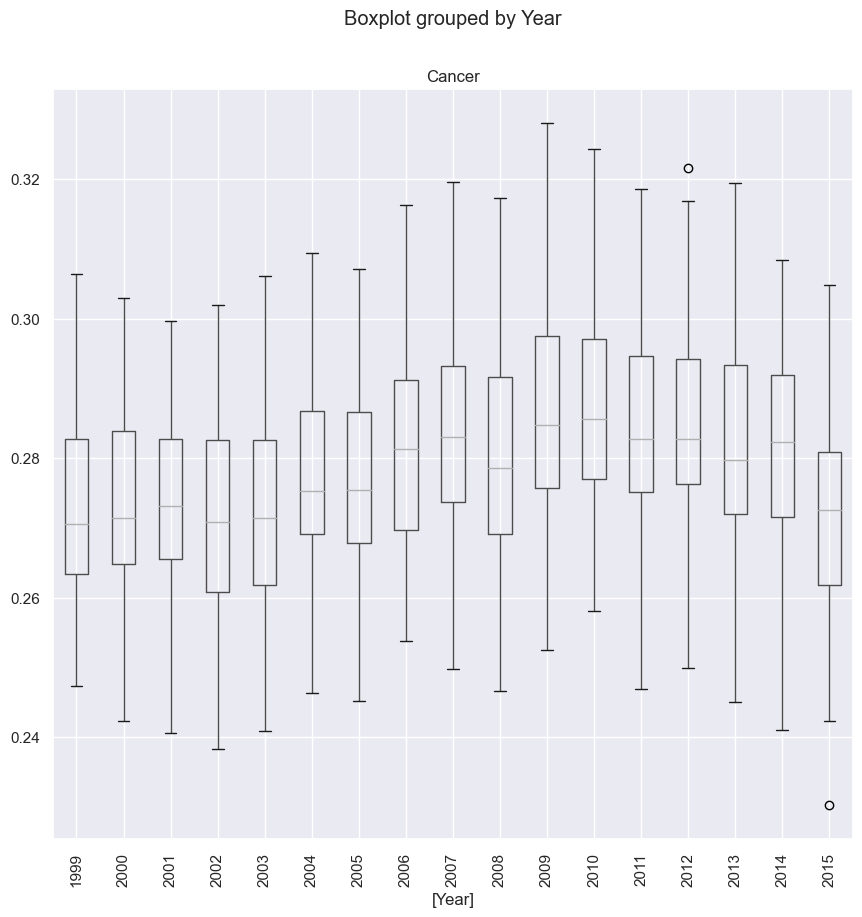

In [70]:
# box plot of Cancer by year for all states
# years_by_state_pct.info()
cancer = years_by_state_pct.loc[:,'Cancer'].to_frame()
cancer.boxplot(by='Year', figsize=(10, 10), rot=90)

In [100]:
# not sure what the age adjusted death rate is, but it's interesting to see
age_adjusted_by_year = data.groupby(['Year', 'State', 'Cause name'])['Age-adjusted death rate'].sum().unstack()
age_adjusted_by_year.head(15)


Cause name                 All Causes  Alzheimer's disease  CLRD  Cancer  \
Year State                                                                 
1999 Alabama                   1009.3                 17.8  48.6   210.9   
     Alaska                     838.9                 11.9  56.4   190.5   
     Arizona                    818.4                 20.8  51.2   179.9   
     Arkansas                   975.3                 14.8  46.8   214.1   
     California                 802.3                 16.6  46.9   184.9   
     Colorado                   801.8                 24.5  58.1   171.1   
     Connecticut                783.2                 11.4  37.8   191.0   
     Delaware                   881.6                 15.0  42.7   223.3   
     District of Columbia      1087.3                  9.5  29.9   241.4   
     Florida                    812.8                 14.3  43.1   190.6   
     Georgia                    964.9                 18.8  49.1   202.3   
     Hawaii                     688.8                  9.4  24.0   156.6   
     Idaho                      825.2                 21.4  49.5   186.4   
     Illinois                   905.1                 15.9  43.2   210.4   
     Indiana                    934.7                 18.9  51.6   217.4   

Cause name                 Chronic liver disease and cirrhosis  Diabetes  \
Year State                                                                 
1999 Alabama                                               9.2      30.0   
     Alaska                                                9.9      23.8   
     Arizona                                              13.4      21.5   
     Arkansas                                              8.0      24.2   
     California                                           11.9      22.5   
     Colorado                                              9.9      19.2   
     Connecticut                                           8.4      18.5   
     Delaware                                              8.7      23.5   
     District of Columbia                                 10.3      39.6   
     Florida                                              11.0      21.5   
     Georgia                                               8.8      22.6   
     Hawaii                                                5.6      17.3   
     Idaho                                                 7.5      23.1   
     Illinois                                              9.2      25.2   
     Indiana                                               7.5      26.9   

Cause name                 Diseases of Heart  \
Year State                                     
1999 Alabama                           303.0   
     Alaska                            198.0   
     Arizona                           223.1   
     Arkansas                          287.8   
     California                        257.3   
     Colorado                          196.3   
     Connecticut                       238.8   
     Delaware                          269.2   
     District of Columbia              296.2   
     Florida                           247.7   
     Georgia                           282.8   
     Hawaii                            201.7   
     Idaho                             220.5   
     Illinois                          279.1   
     Indiana                           282.5   

Cause name                 Essential hypertension and hypertensive renal disease  \
Year State                                                                         
1999 Alabama                                                             7.1       
     Alaska                                                              0.0       
     Arizona                                                             5.0       
     Arkansas                                                            5.3       
     California                                                          7.3       
     Colo

In [72]:
# create a table of causes of death by year for each state
#TODO: improve readability when using year
data_without = data.loc[data['Cause name'] != 'All Causes'] # Remove all causes
data_without = data_without.loc[data['State'] != 'United States'] #Remove United States
#us_by_state_cause = data_without.groupby(['State','Cause name']).agg({'Deaths': 'sum'}) #Group and sum
us_by_state_cause = data_without.groupby(['State','Year','Cause name']).agg({'Deaths': 'sum'}) #Group and sum
us_by_state_cause = us_by_state_cause.groupby(level=0).apply(lambda x:100 * x/ float(x.sum())) #Percentage
#us_by_state_cause = us_by_state_cause.sort_values(['State','Deaths'], ascending=False)
us_by_state_cause = us_by_state_cause.sort_values(['Year','State','Deaths'], ascending=False)
print(us_by_state_cause)

                                                                   Deaths
State   Year Cause name                                                  
Wyoming 2015 Diseases of Heart                                   1.731820
             Cancer                                              1.565364
             Unintentional Injuries                              0.672551
             CLRD                                                0.618747
             Stroke                                              0.332913
...                                                                   ...
Alabama 1999 Chronic liver disease and cirrhosis                 0.062418
             Essential hypertension and hypertensive renal d...  0.047420
             Pneumonitis due to solids and liquids               0.046359
             Parkinson's disease                                 0.031361
             All Causes                                          0.000000

[15028 rows x 1 columns]


In [73]:
# Do the percentages of the causes change over time by state?


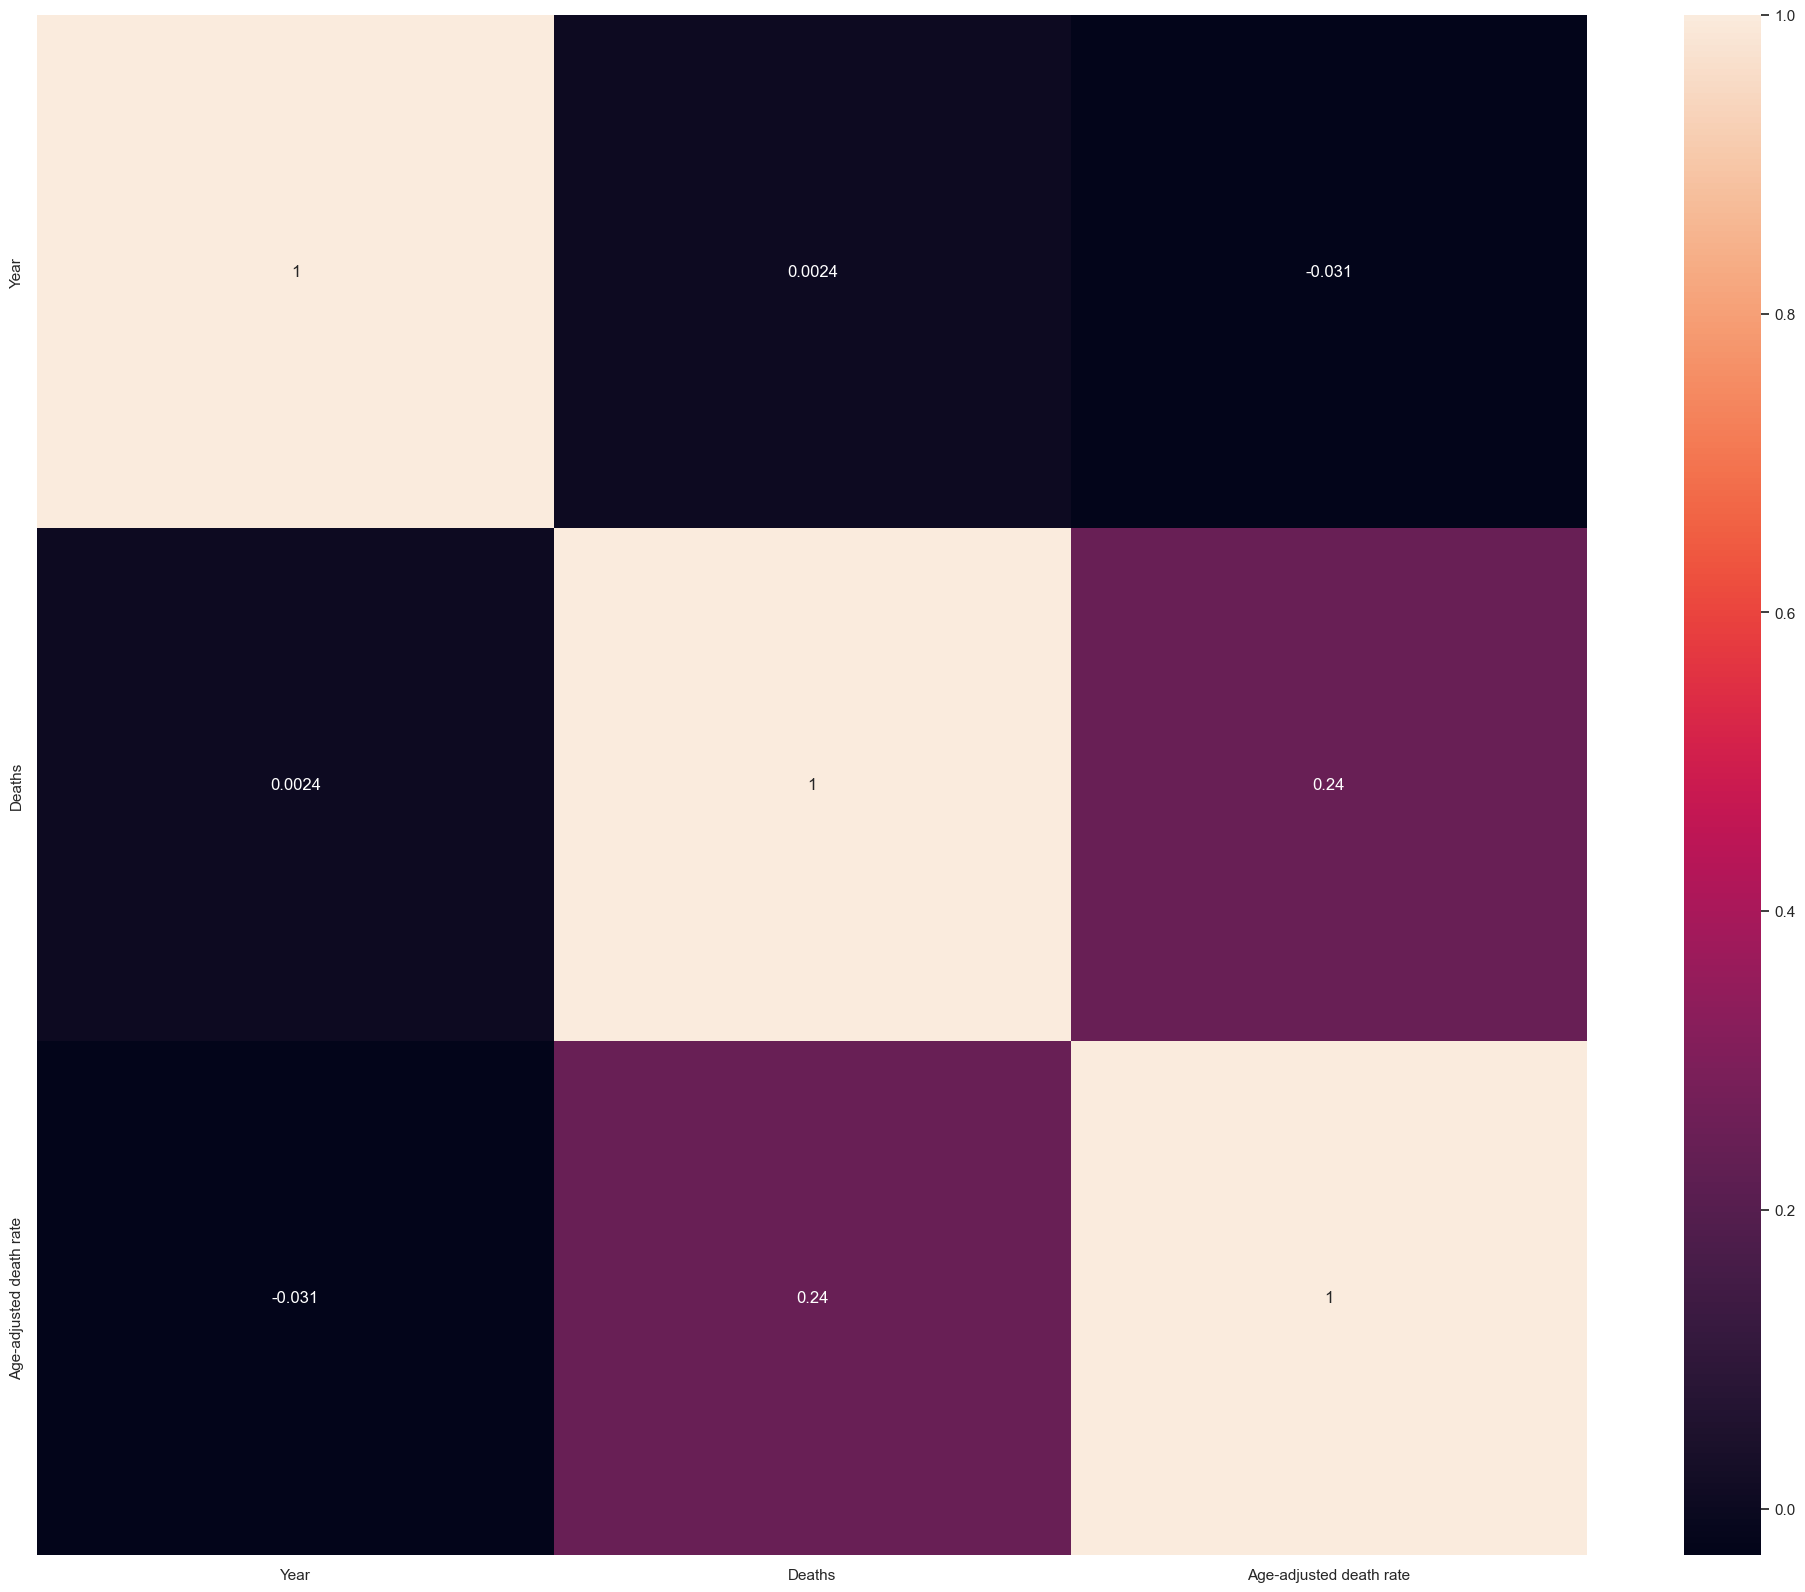

<Figure size 500x500 with 0 Axes>

In [74]:
#Corralation matrix
sns.heatmap(data=data.corr(),annot=True) #heatmap based on the corralation of variables
plt.figure(figsize=(5,5)) #Create a figure with the size of 5x5 inches
plt.show()